# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



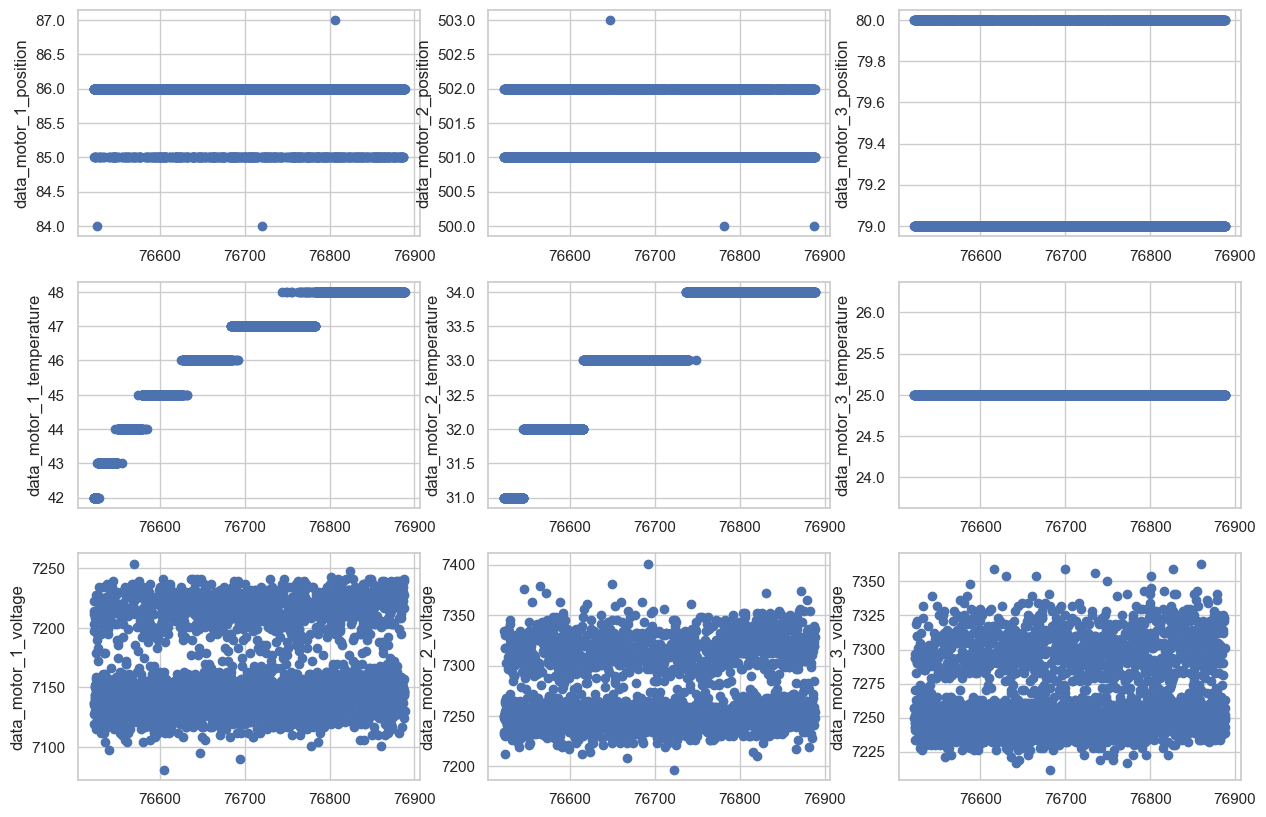

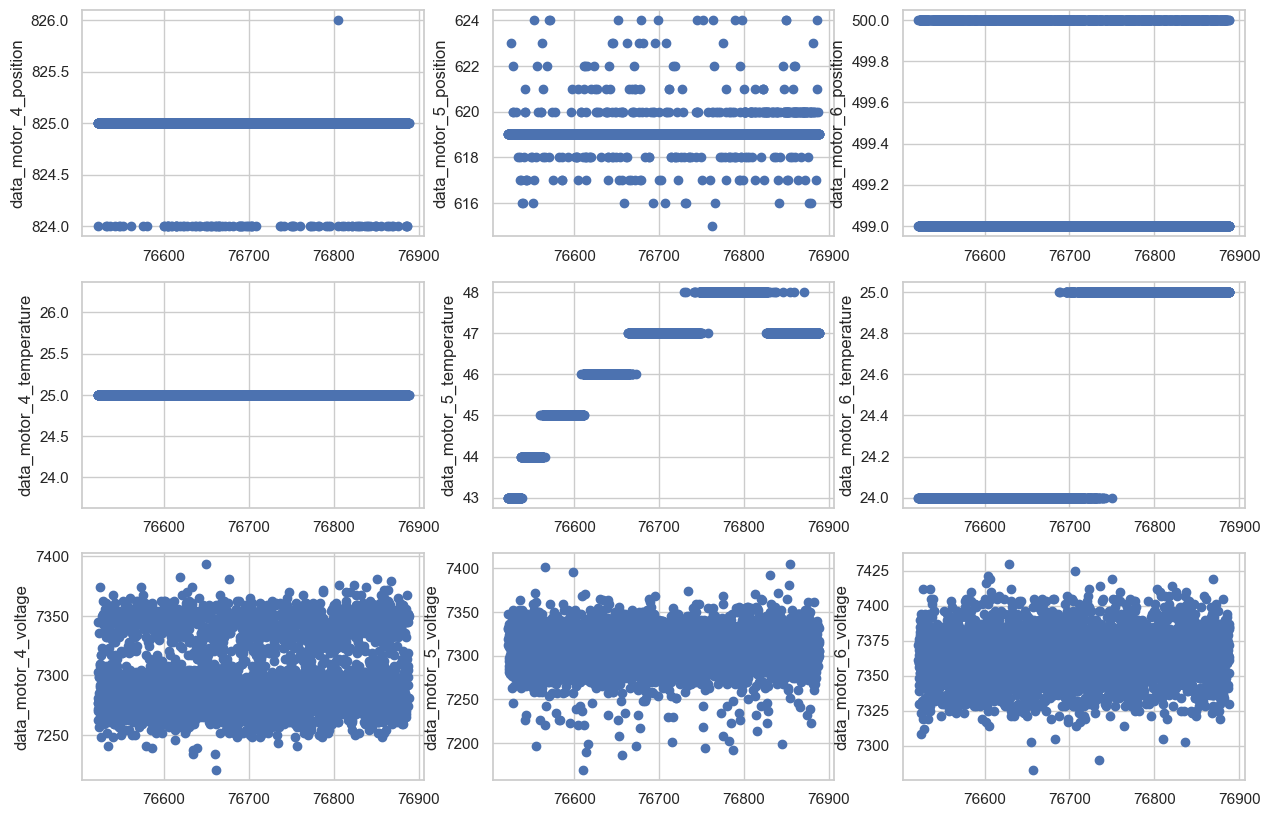

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



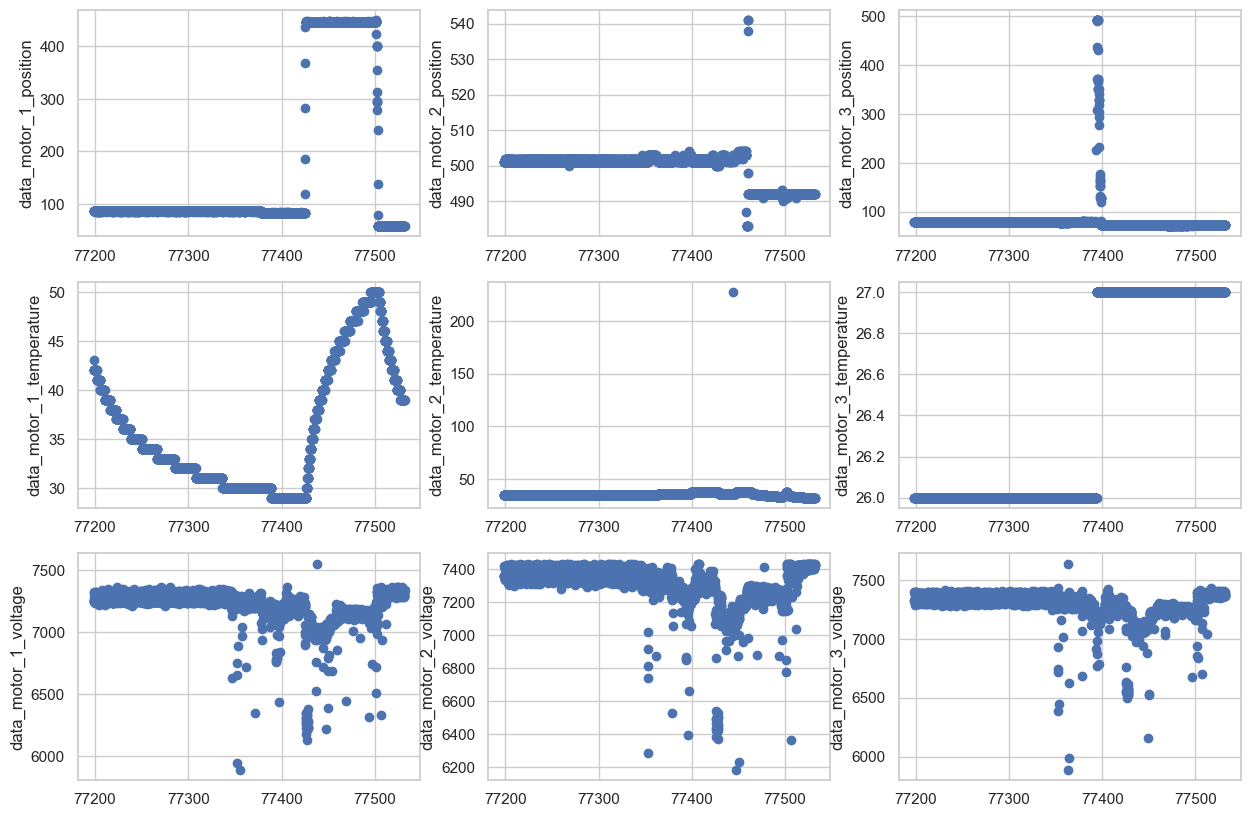

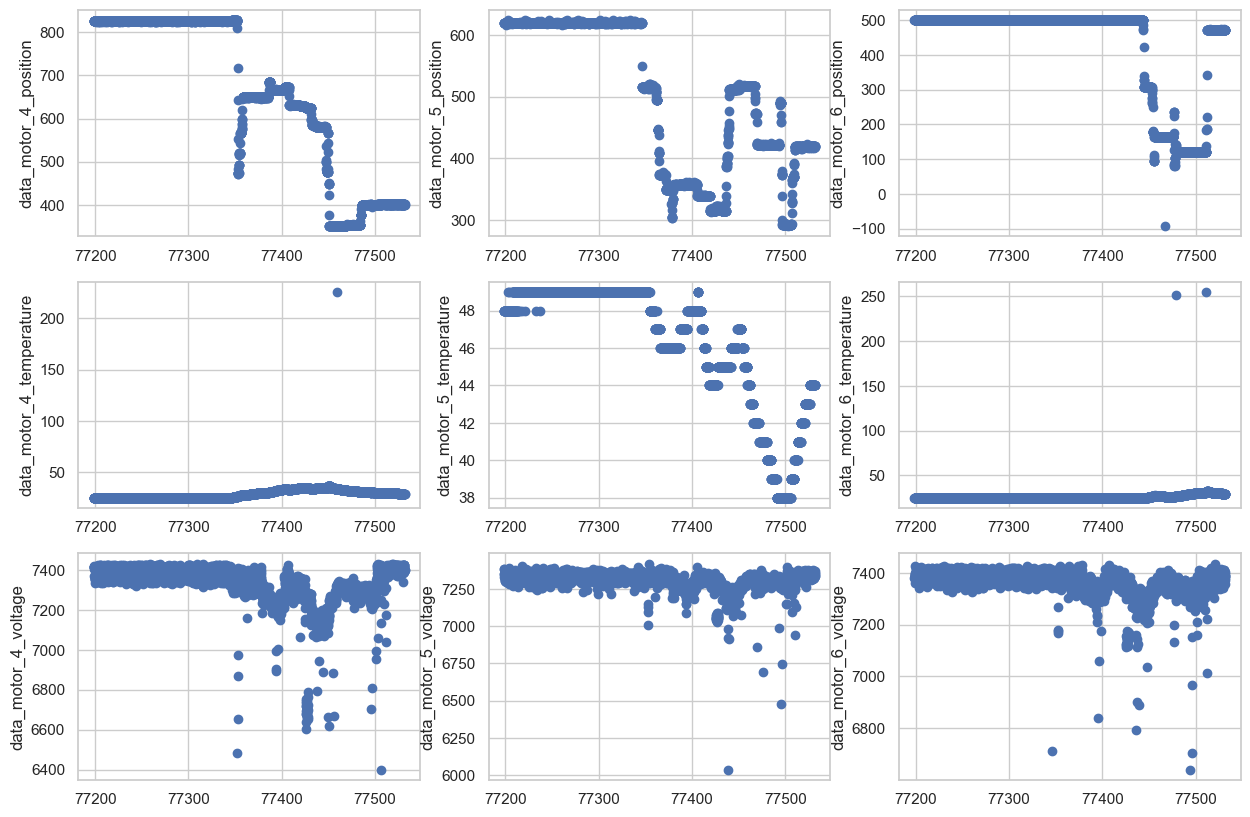

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



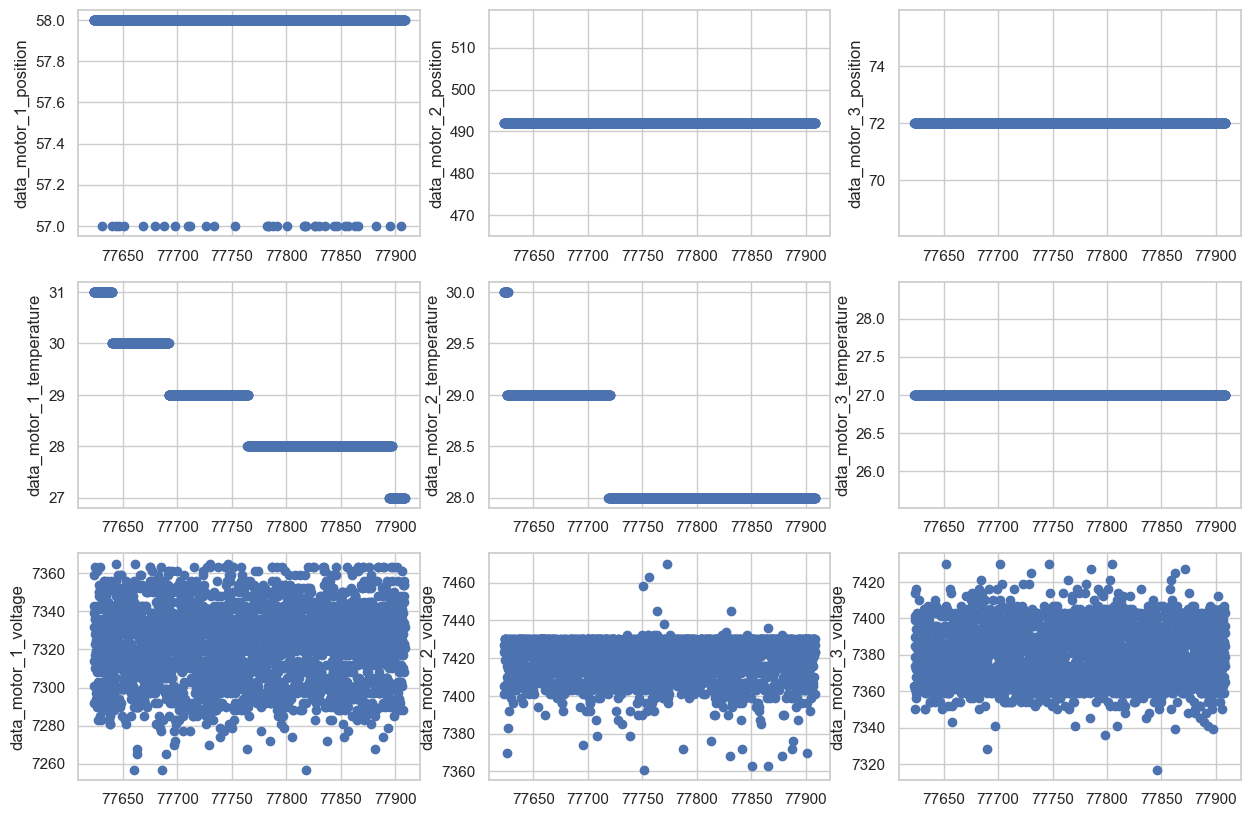

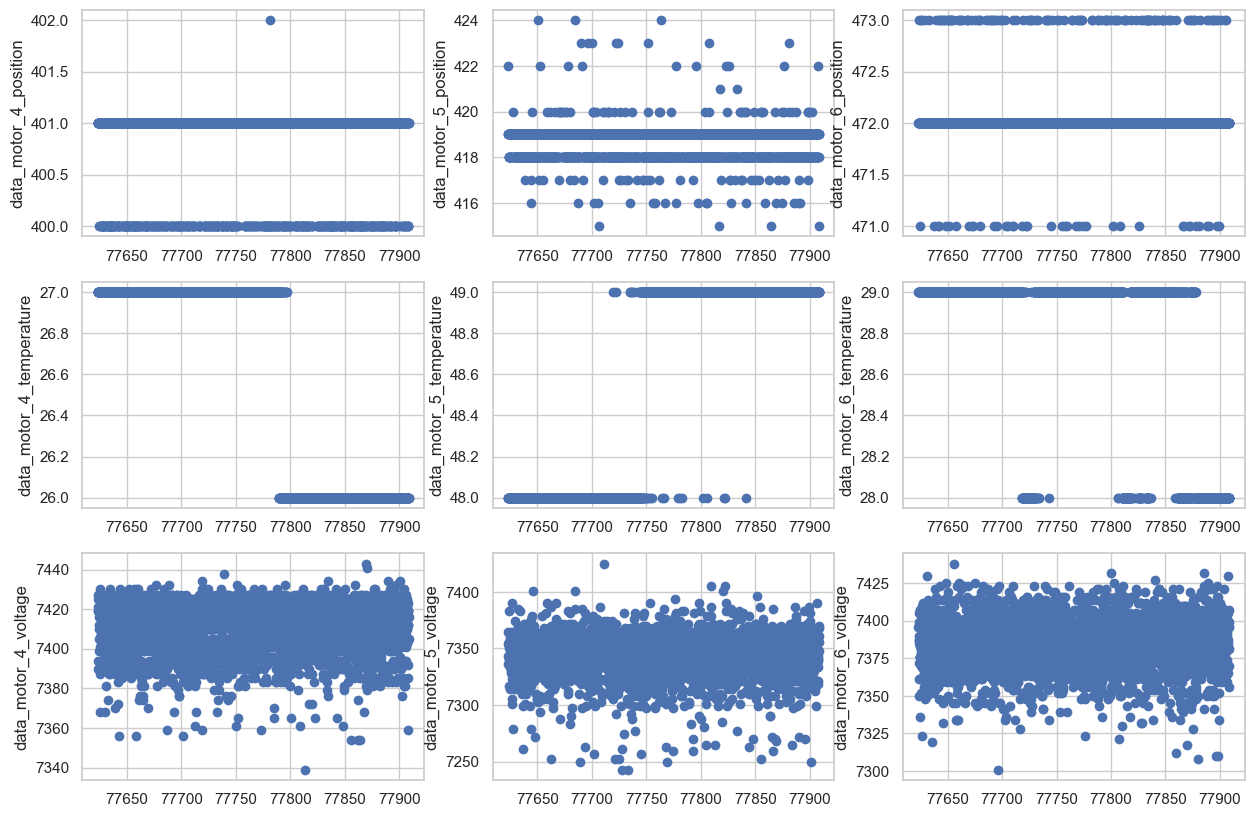

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



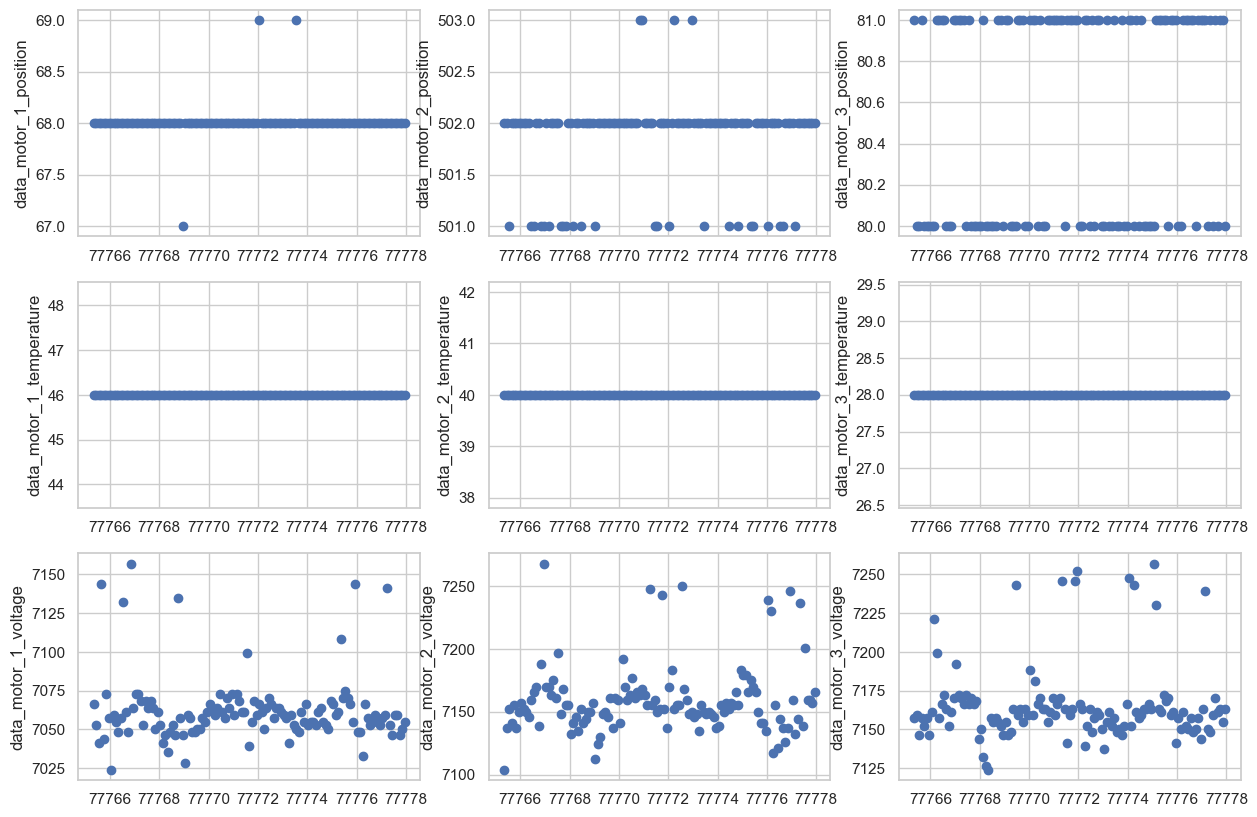

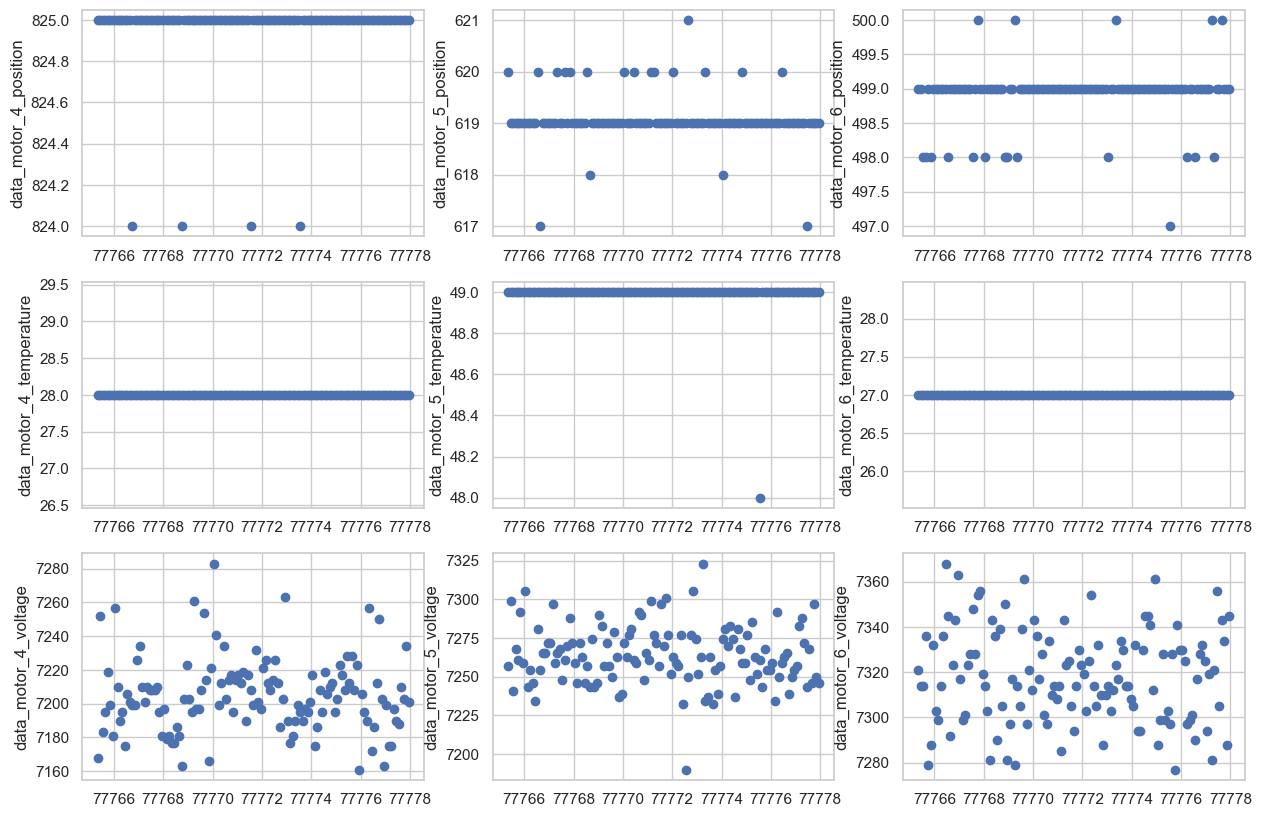

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



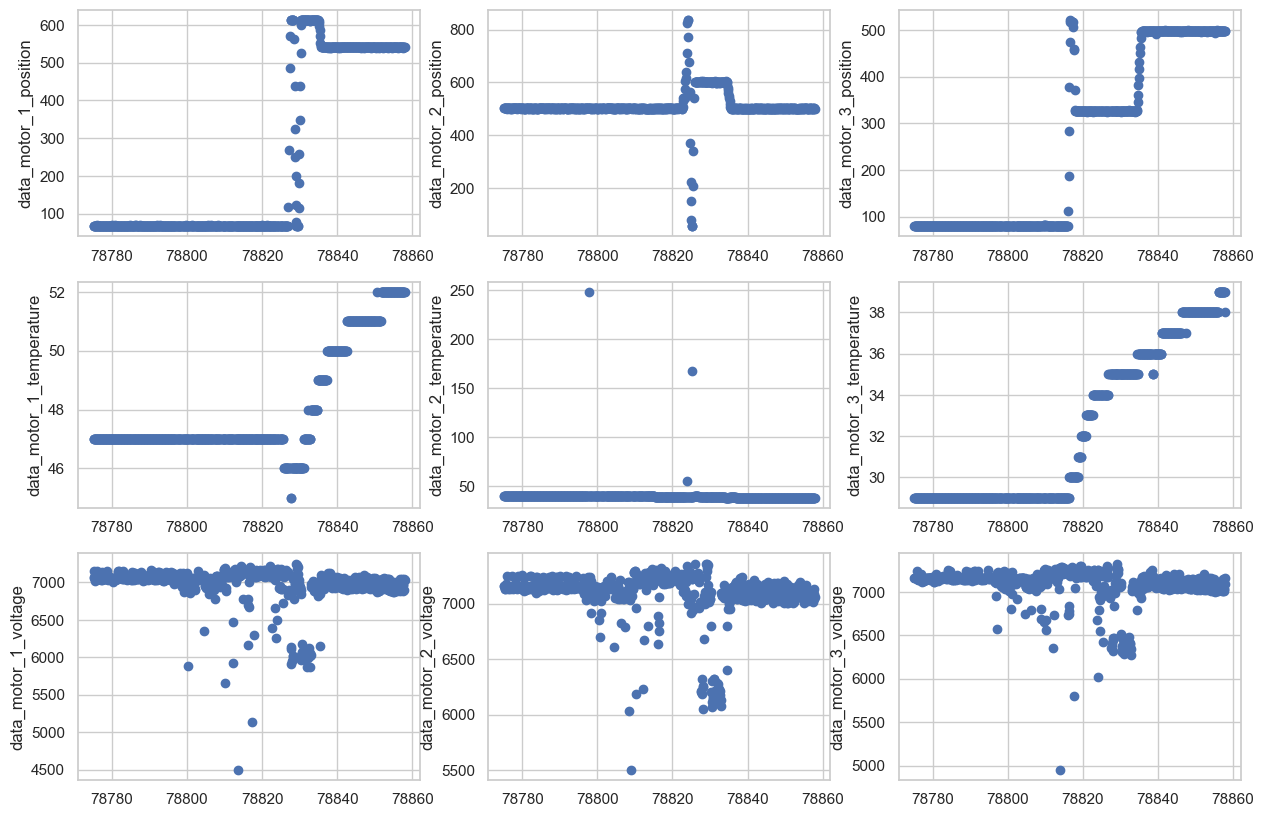

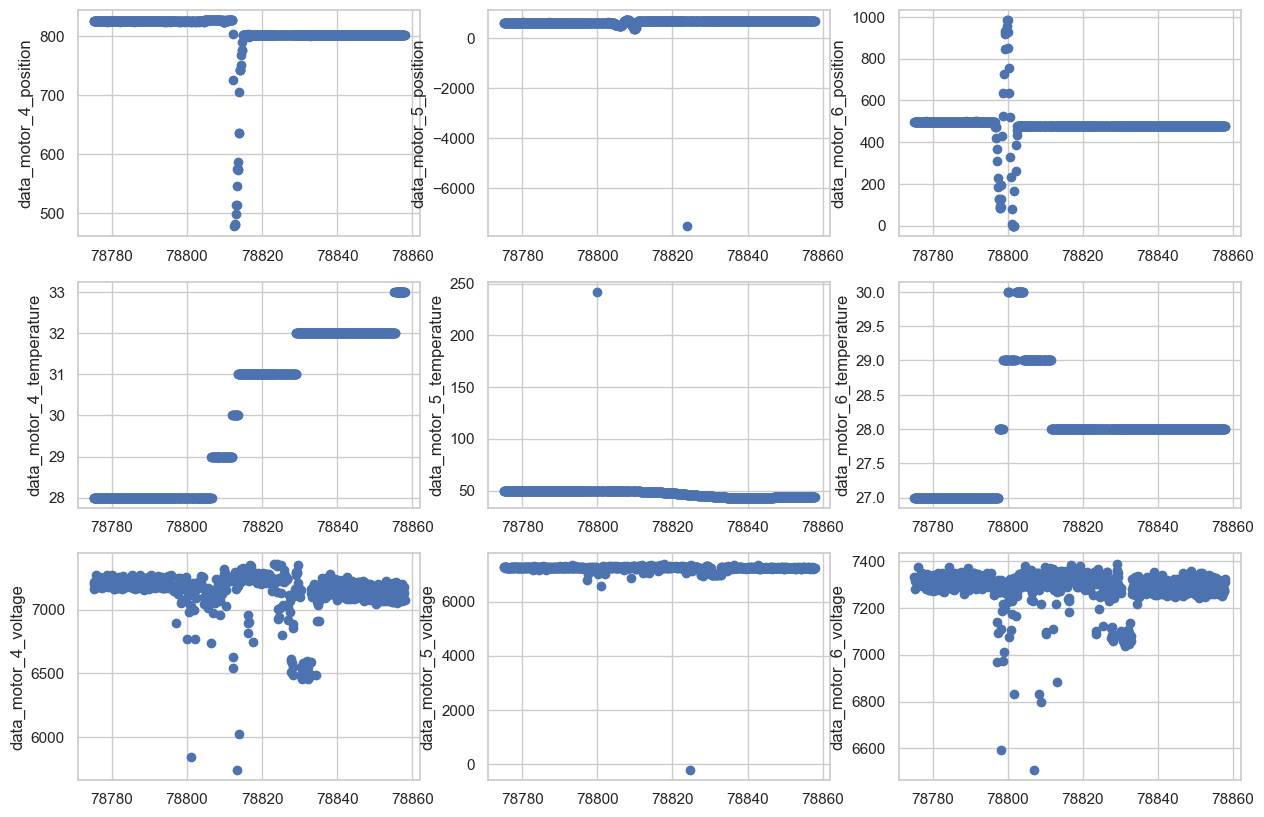

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



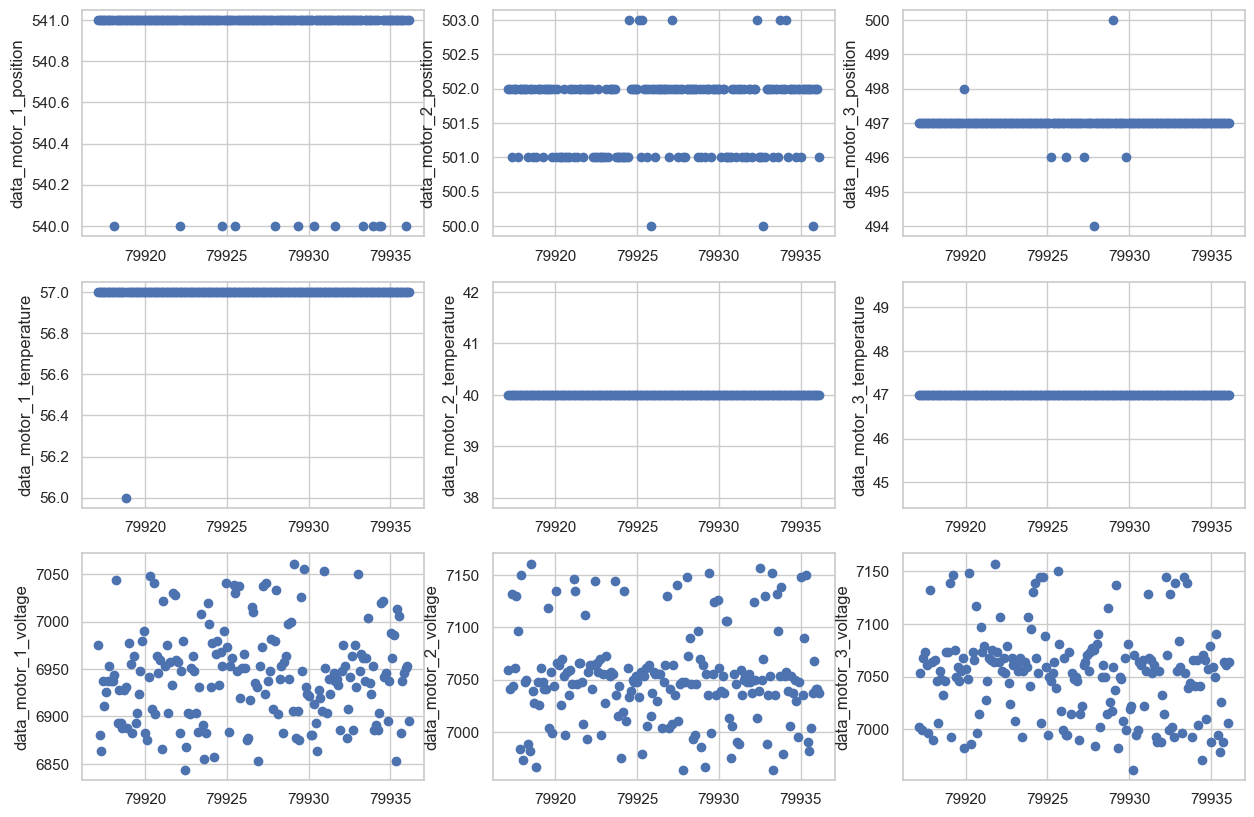

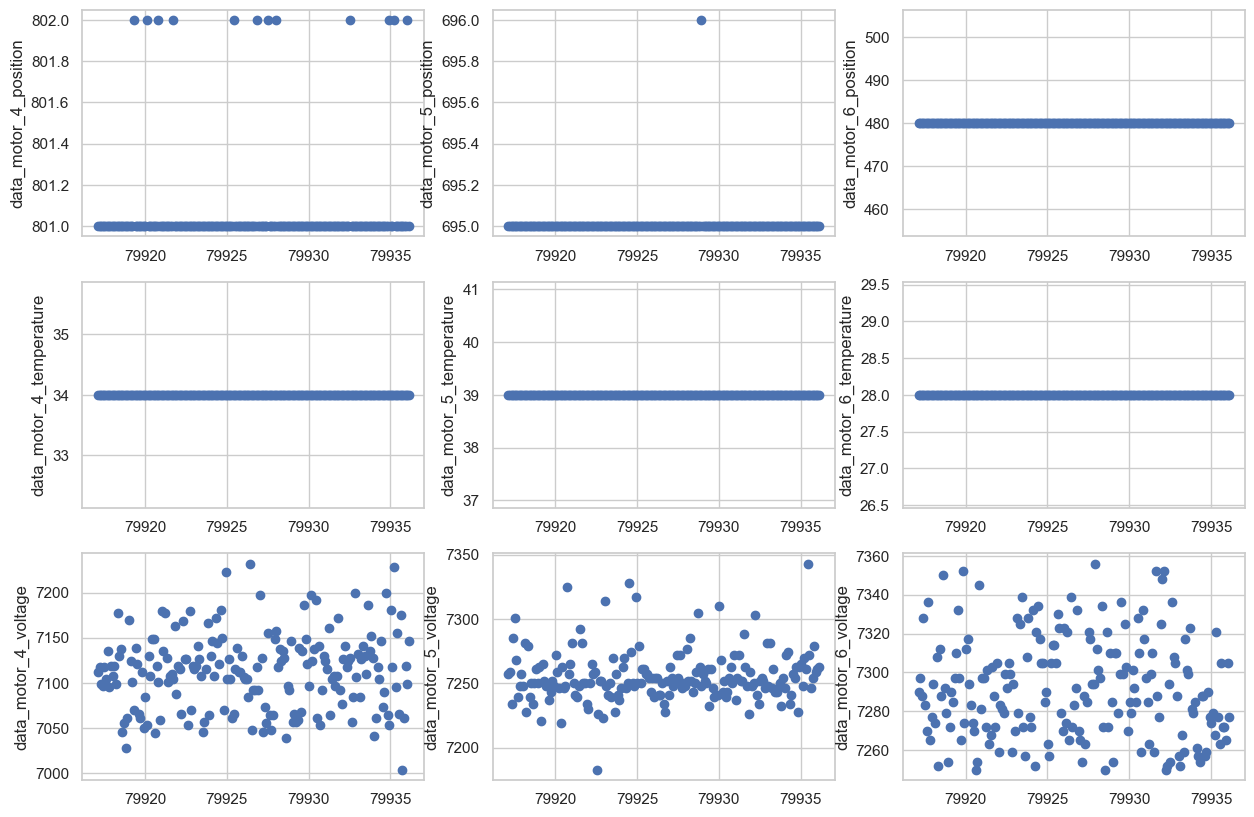

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



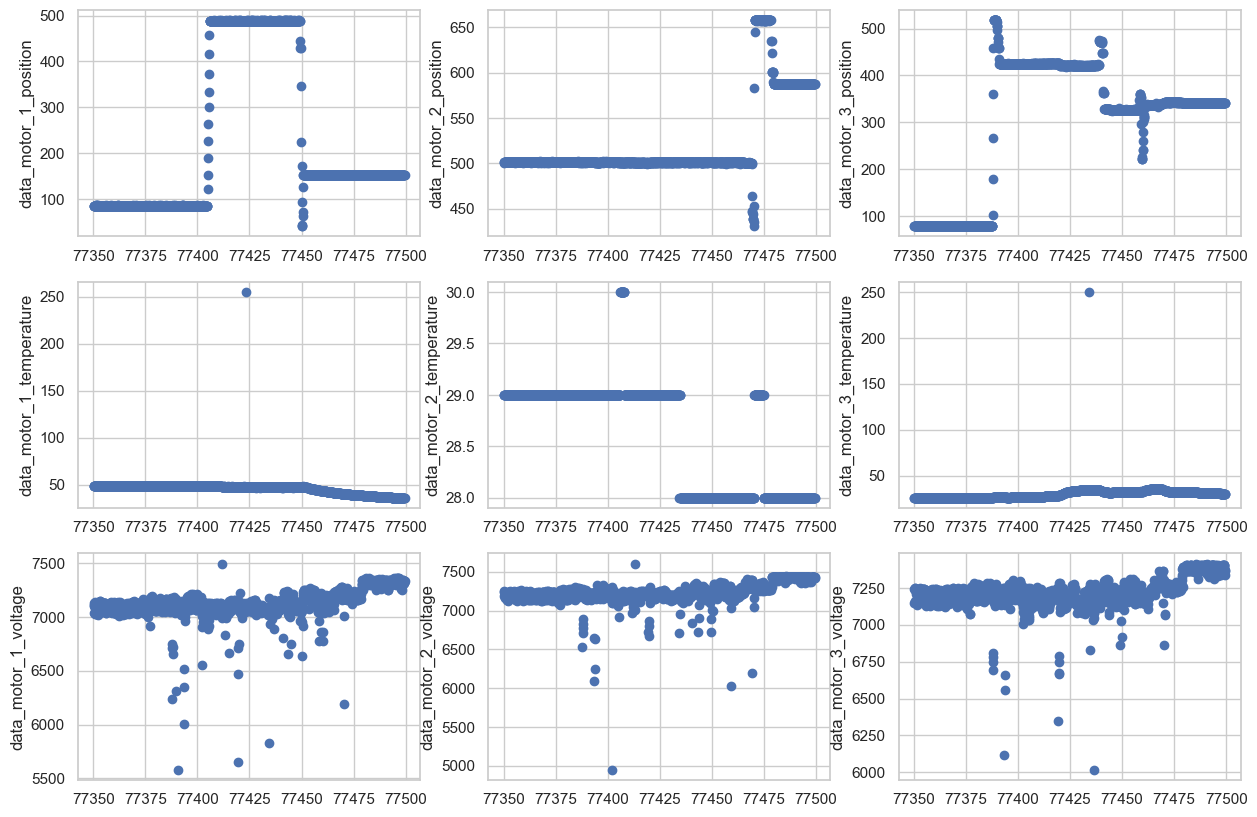

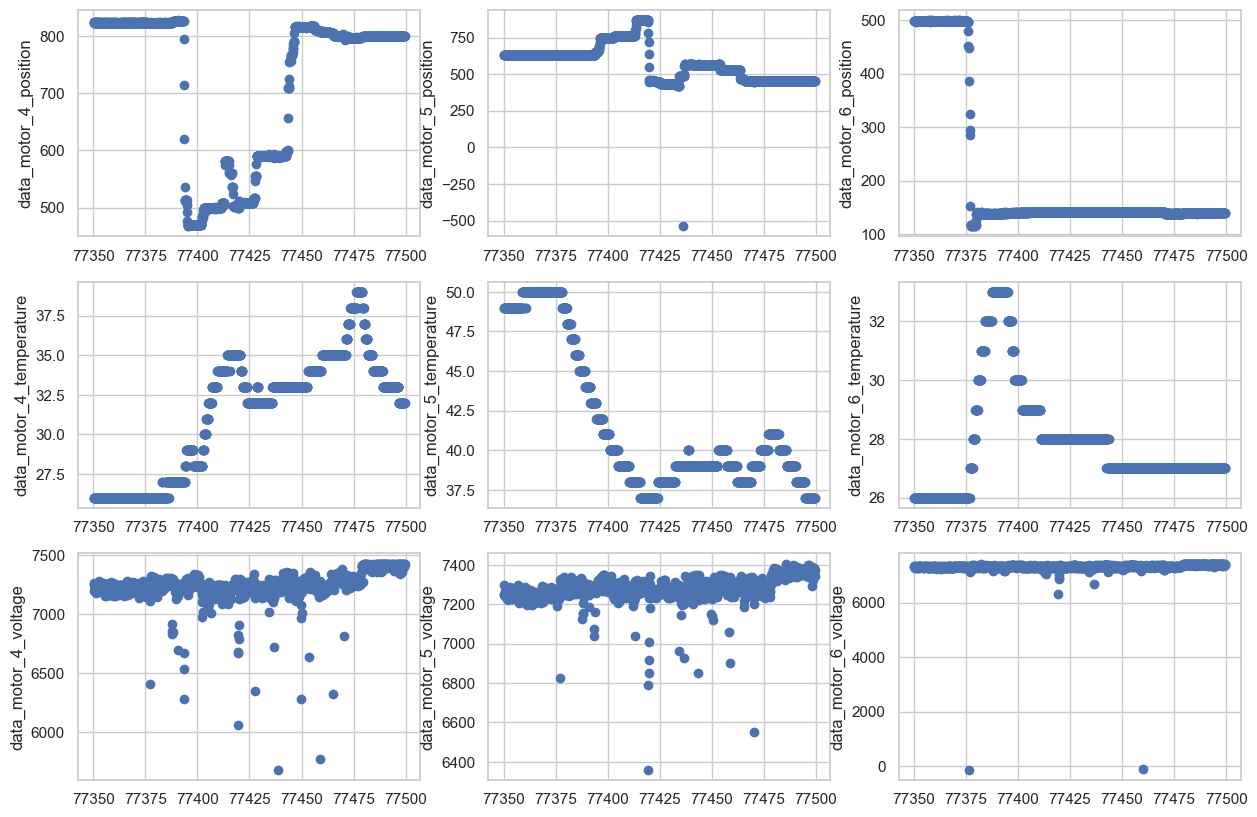

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



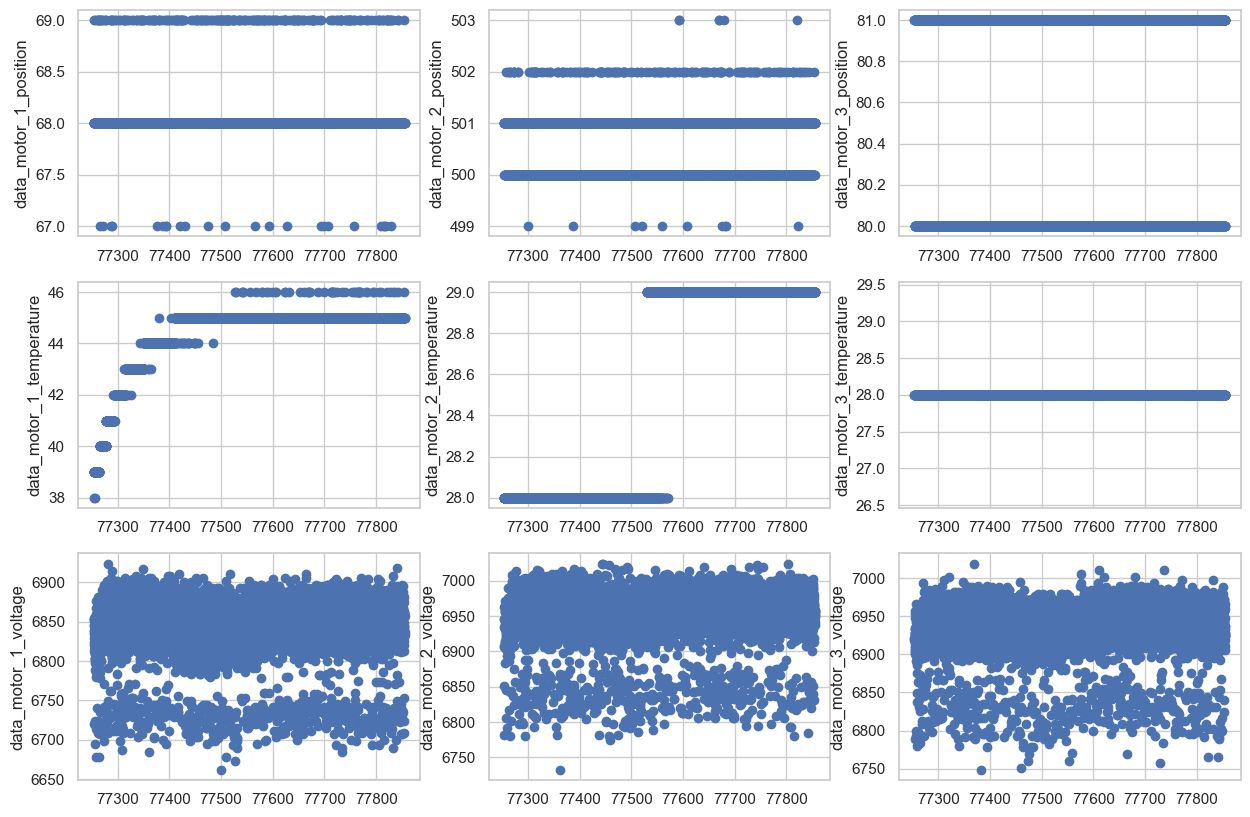

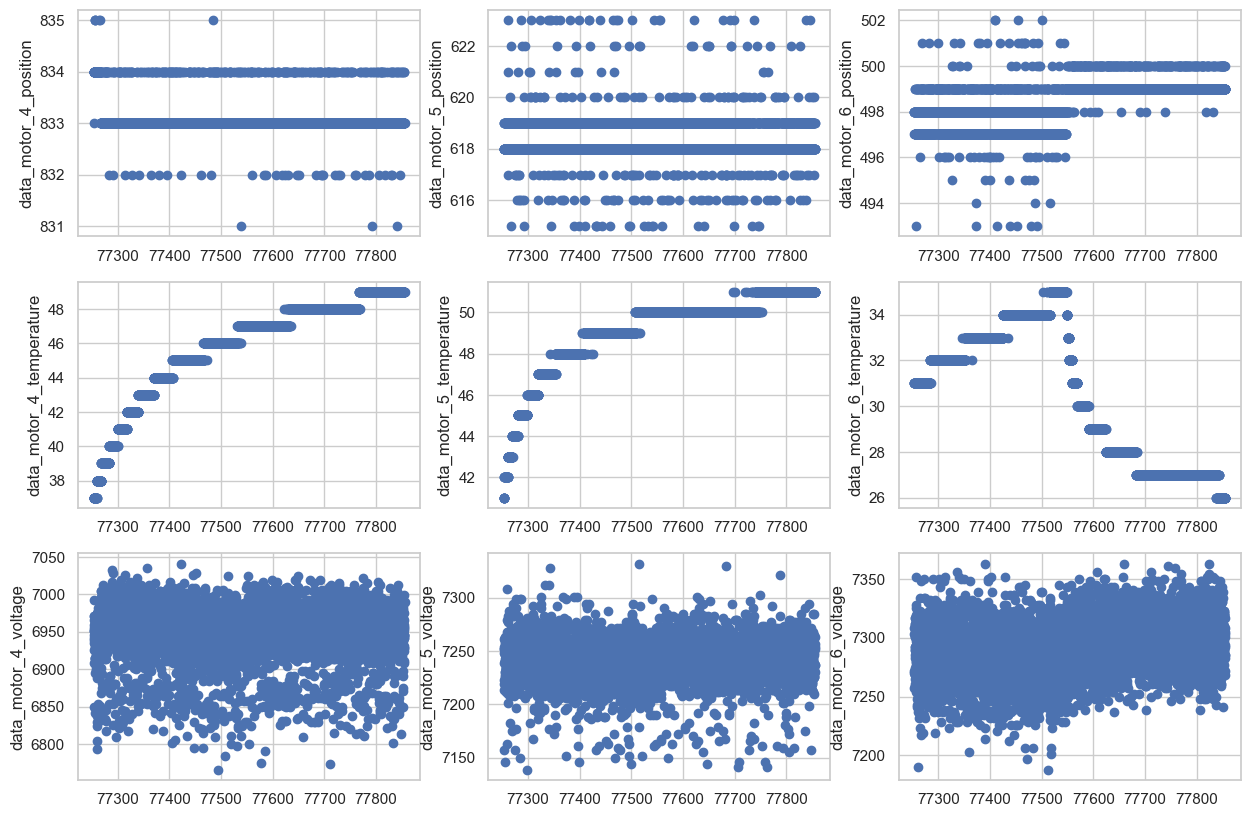

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



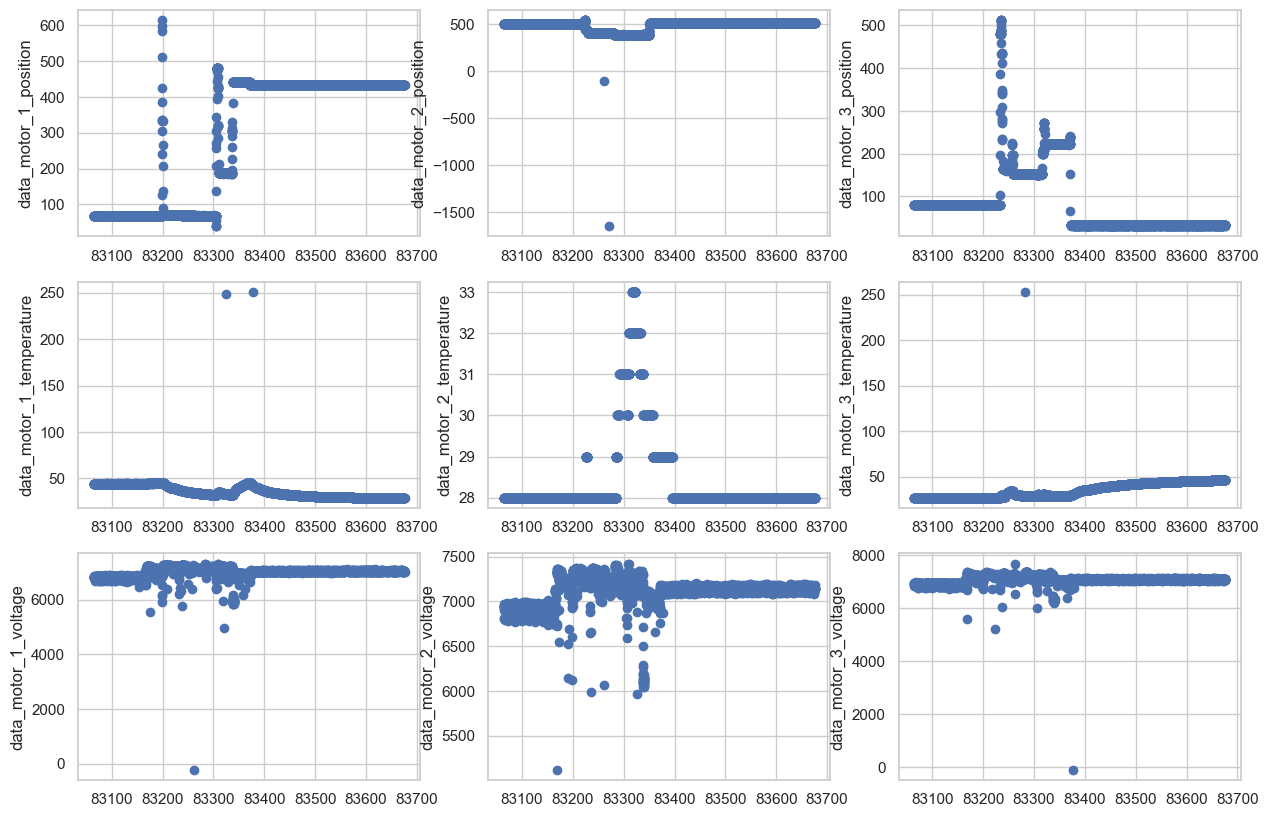

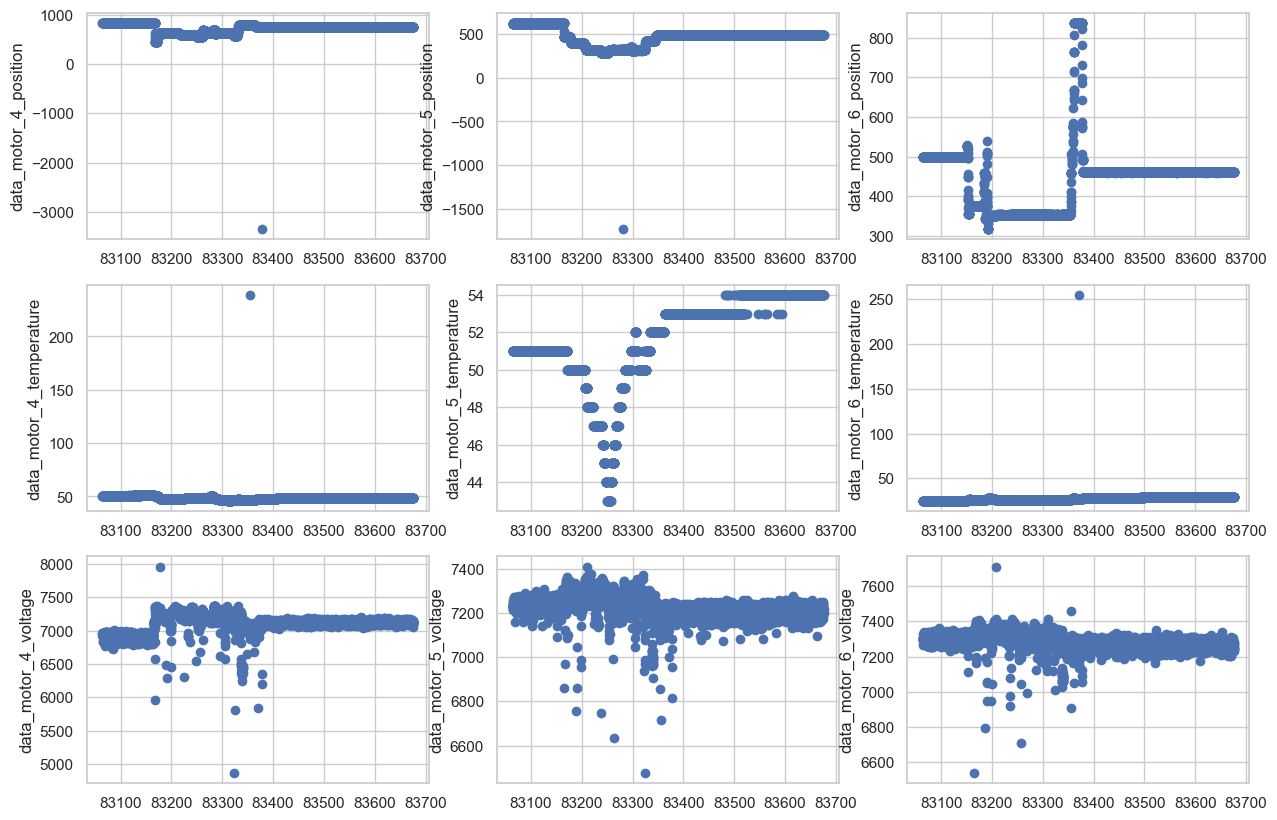

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



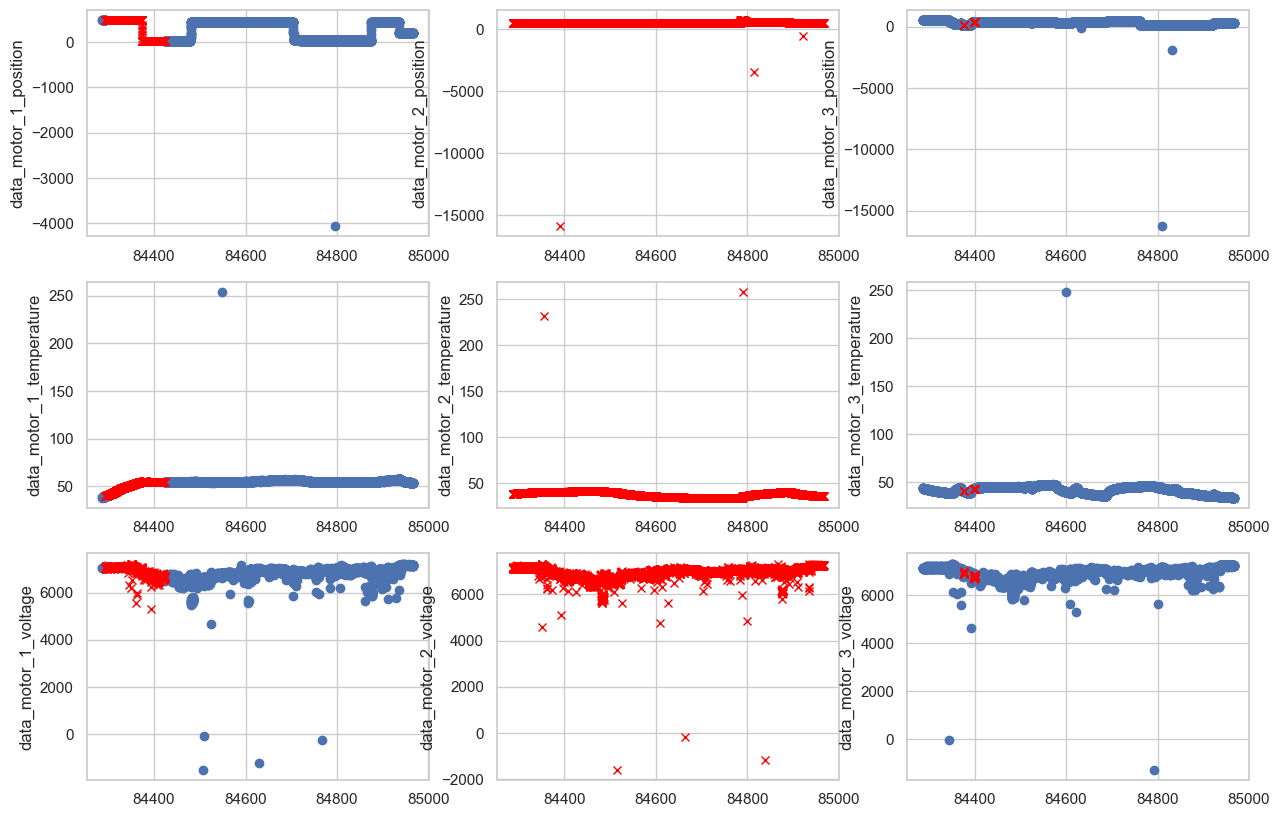

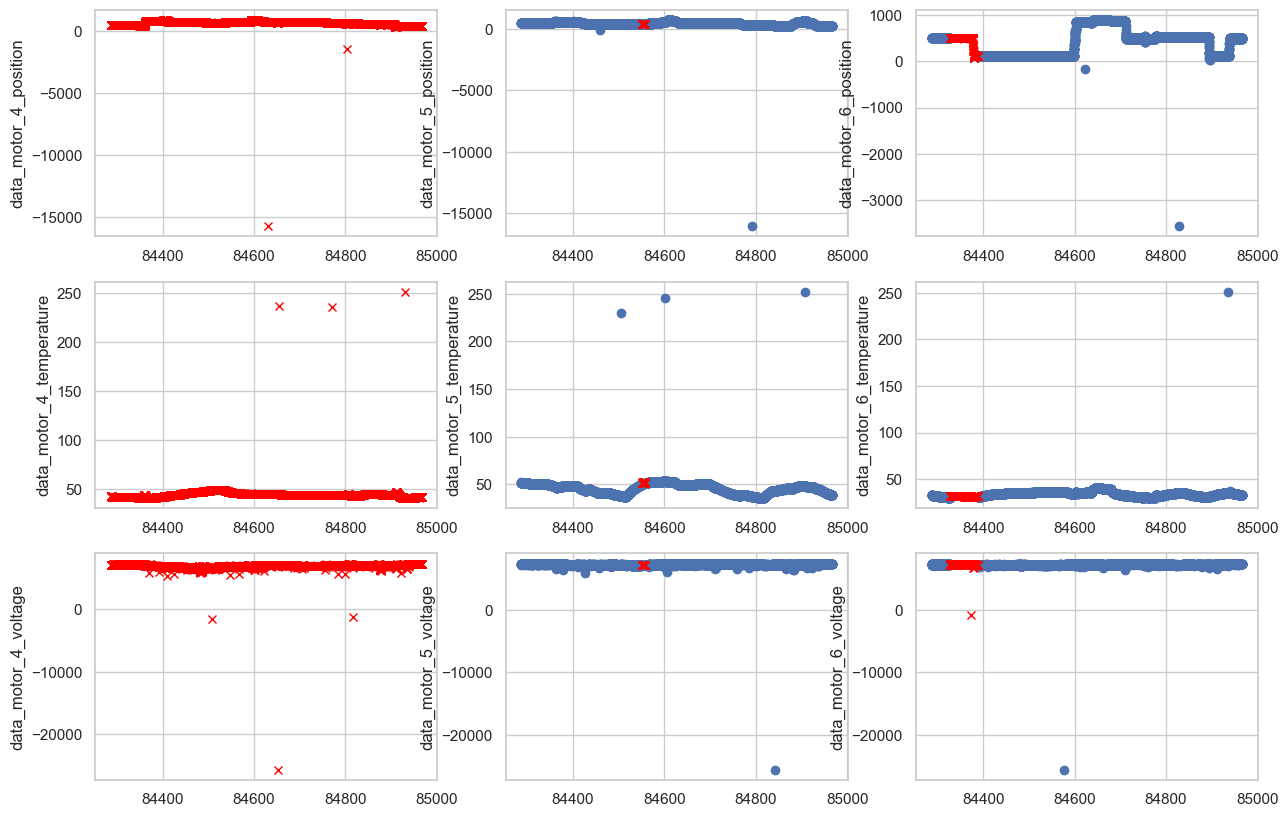

In [77]:
import sys
sys.path.append('../../supporting_scripts/WP_1')  # Add the relative path to the sys.path
from utility import read_all_test_data_from_path


df = read_all_test_data_from_path('../../dataset/training_data/', is_plot=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31135 entries, 0 to 31134
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      31135 non-null  float64
 1   data_motor_1_position     31135 non-null  int64  
 2   data_motor_1_temperature  31135 non-null  int64  
 3   data_motor_1_voltage      31135 non-null  int64  
 4   data_motor_1_label        31135 non-null  int64  
 5   data_motor_2_position     31135 non-null  int64  
 6   data_motor_2_temperature  31135 non-null  int64  
 7   data_motor_2_voltage      31135 non-null  int64  
 8   data_motor_2_label        31135 non-null  int64  
 9   data_motor_3_position     31135 non-null  int64  
 10  data_motor_3_temperature  31135 non-null  int64  
 11  data_motor_3_voltage      31135 non-null  int64  
 12  data_motor_3_label        31135 non-null  int64  
 13  data_motor_4_position     31135 non-null  int64  
 14  data_m

For each motors, there are 4 columns : 
- the *position*
- the *temperature* 
- the *voltage*
- the *label* (which is 0 if there is no abnormaly).  
   
There is also a column named *test_condition* which gives the condition of the measurement and a column *time*.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

- There is some noise for continuous features like voltage, thus we need to apply a moving average algorithm to smooth the data.
- Scaling the features is always usefull so the have the same weights in classification algorithms. Here we have outliers so a standardization is relevant.
- Like we said, we have lots of outliers especially for the position's features, we have to remove them otherwise it could mislead our classification algorithms
- We don't have any missing values like shows the next cell
- It seems like hot temperature and motor's issue are highly correlated
- While the robot status is normal, the temperature usually do not increase quickly

In [79]:
#To check for missing values

import numpy as np

S = 0
for cols in df.columns:
    S += sum(np.asarray(df[cols].isnull()))
    
S

0

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

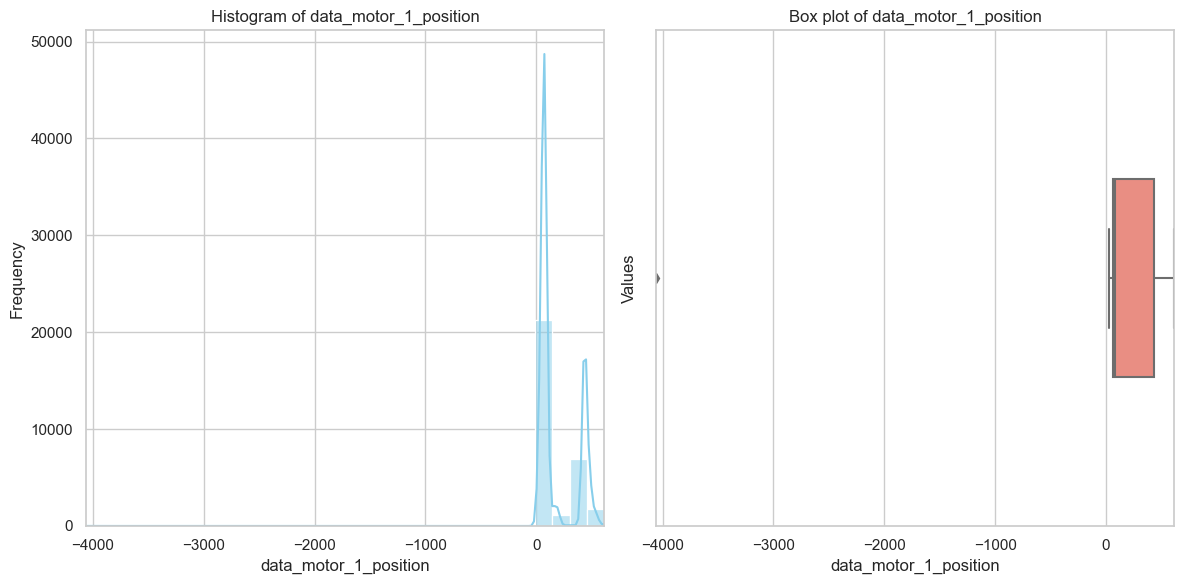

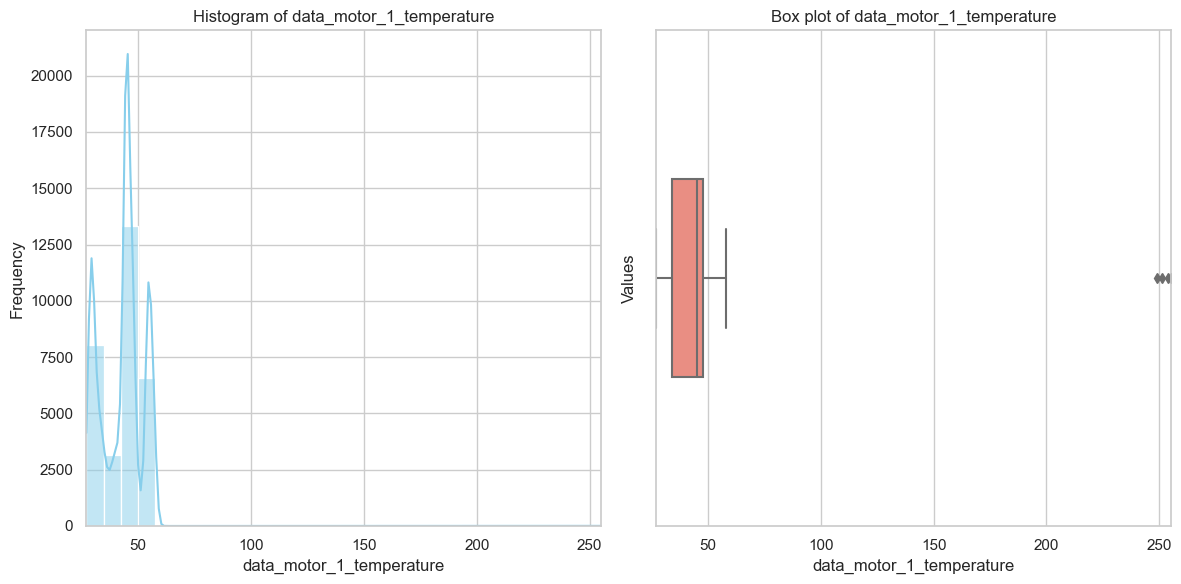

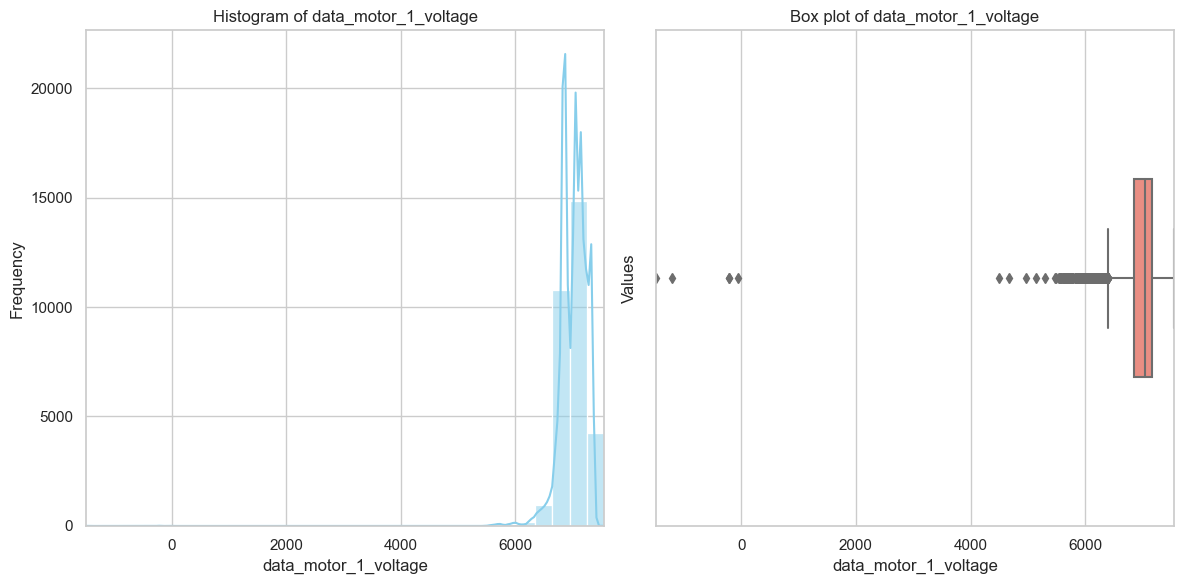

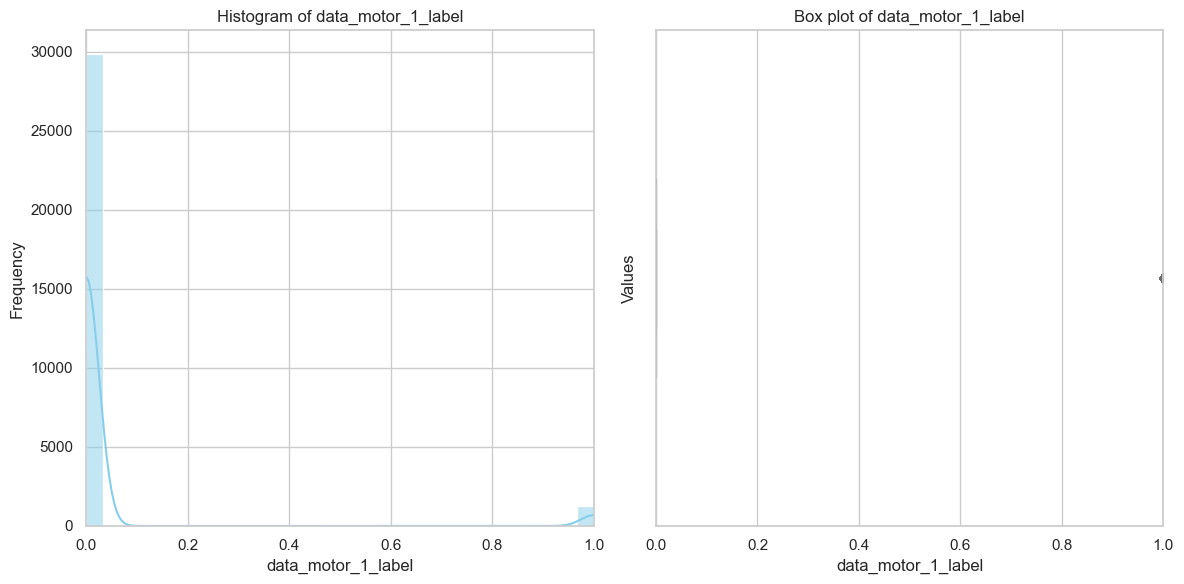

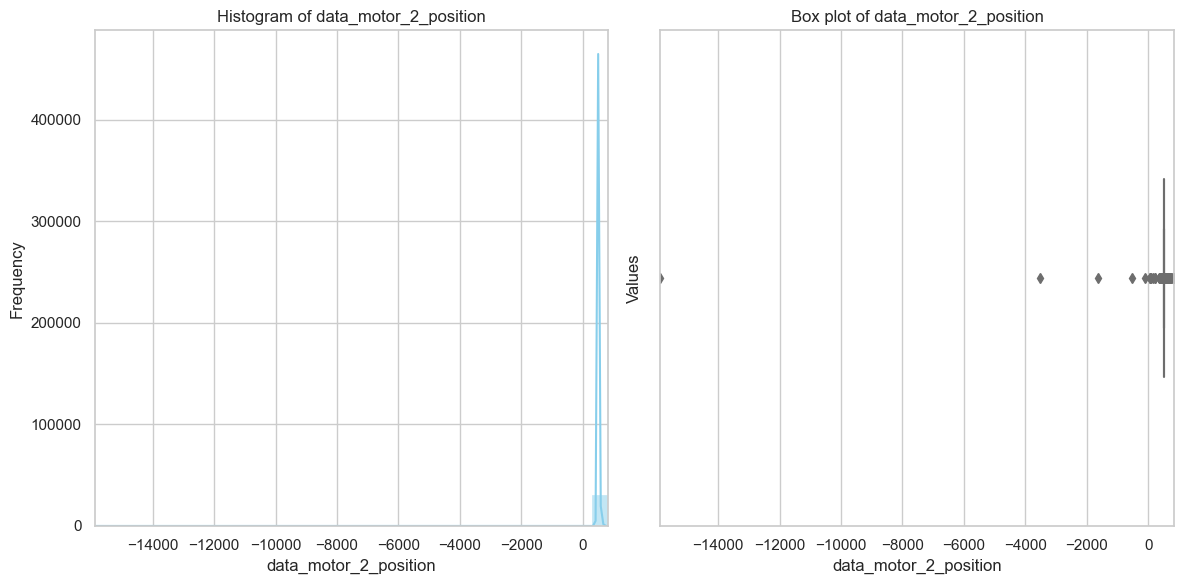

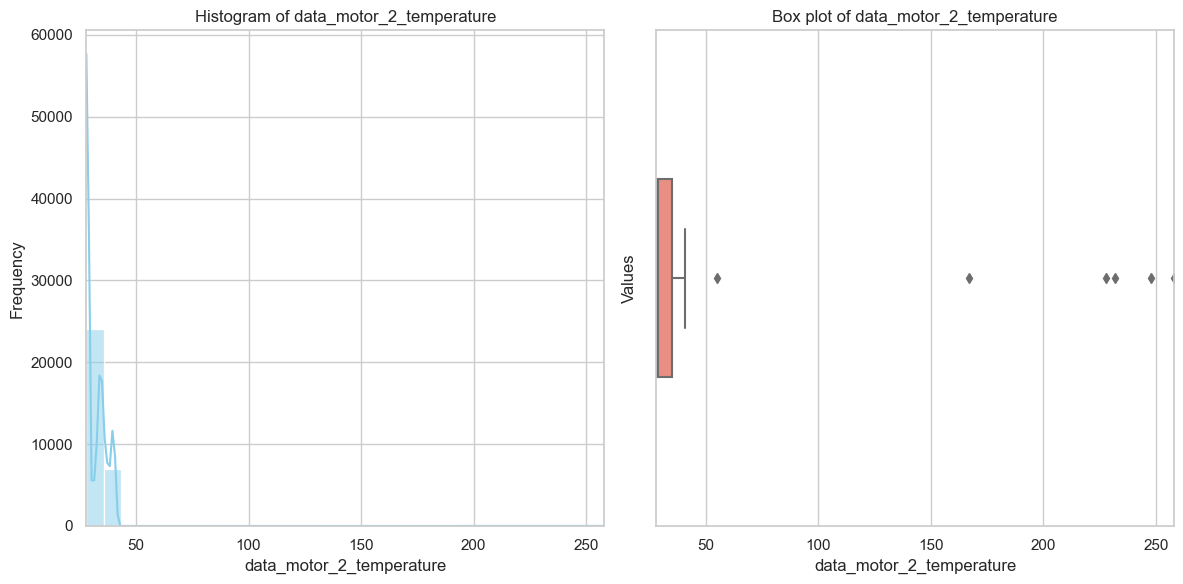

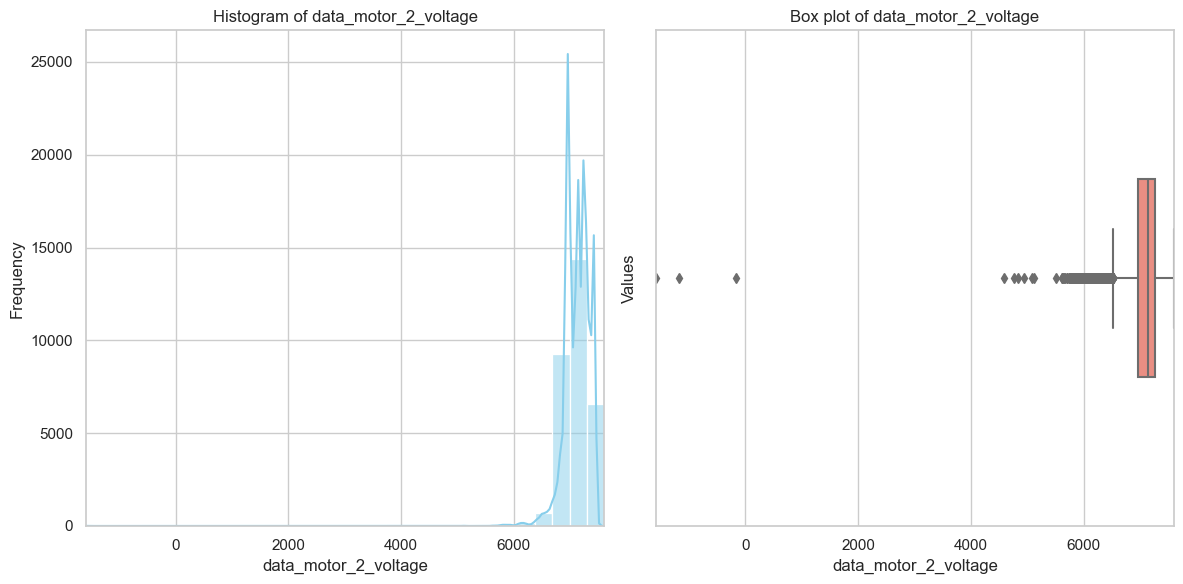

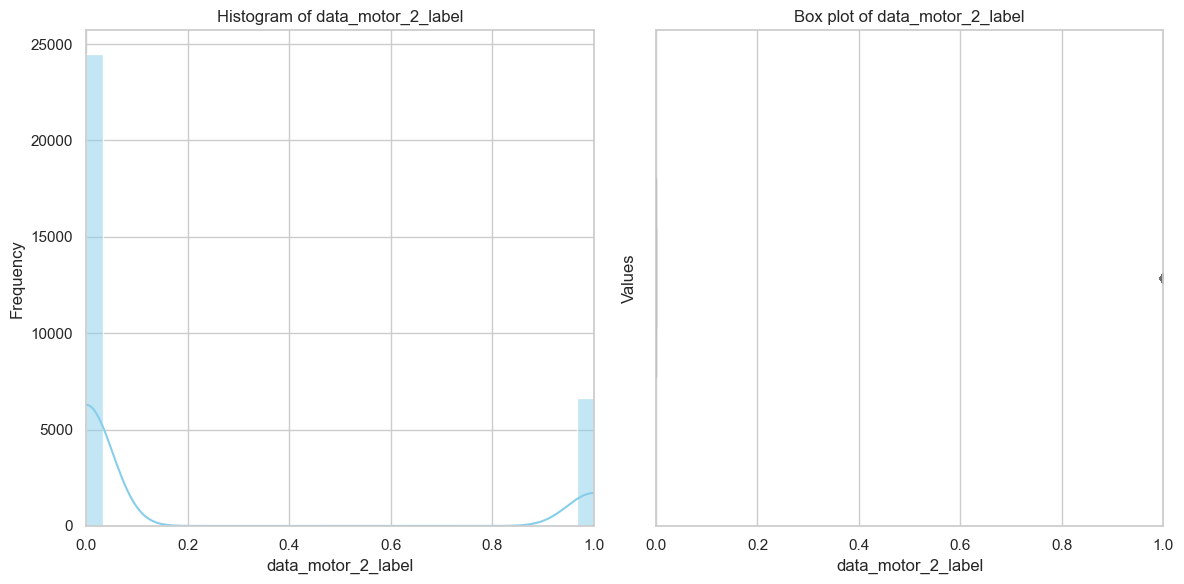

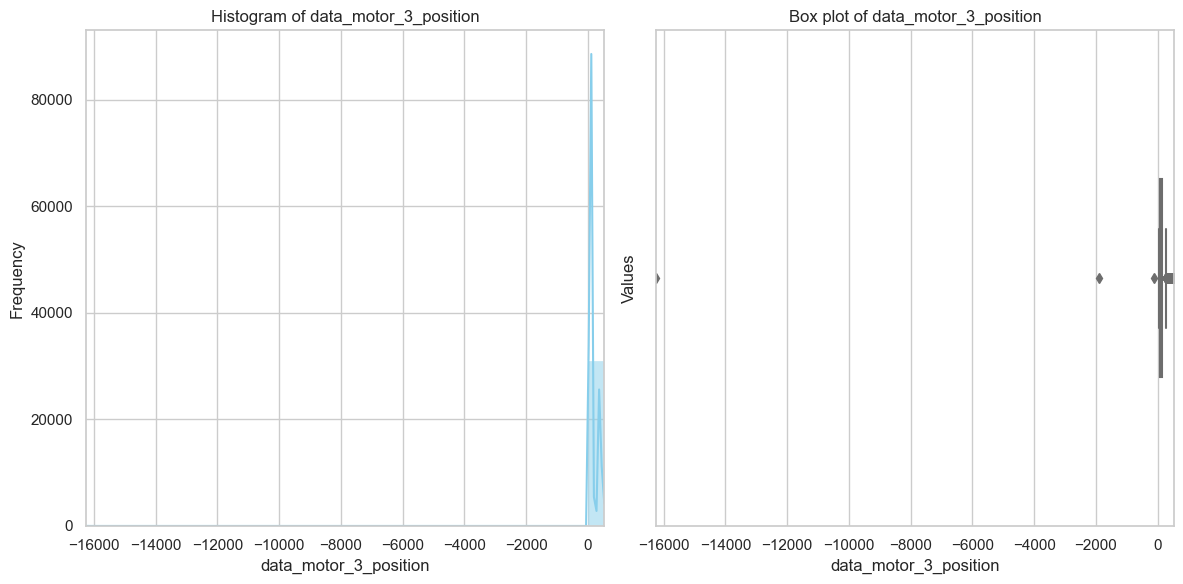

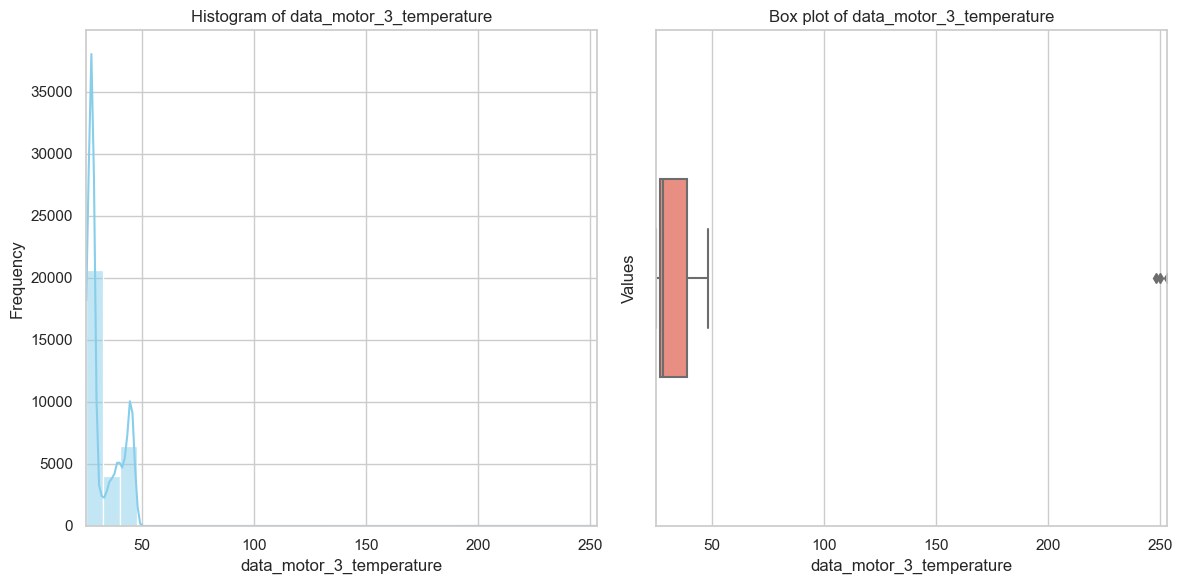

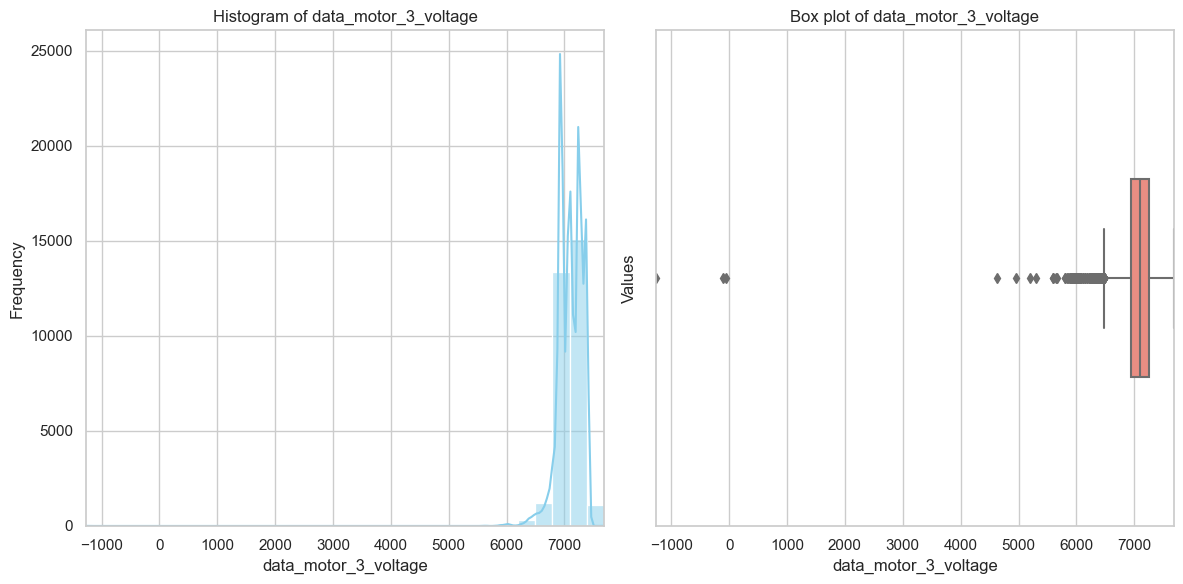

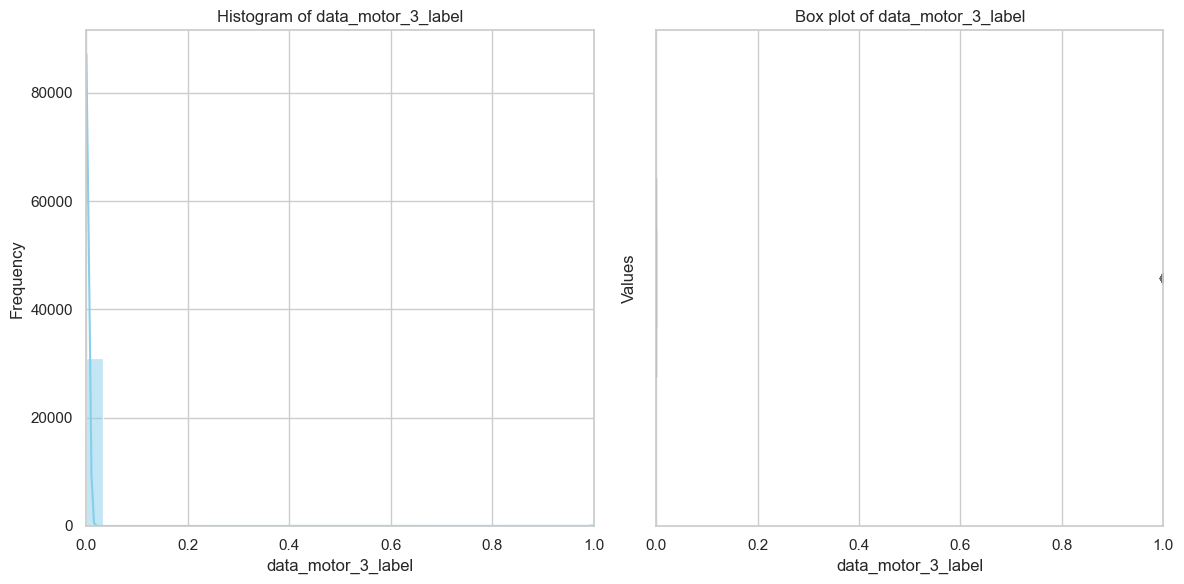

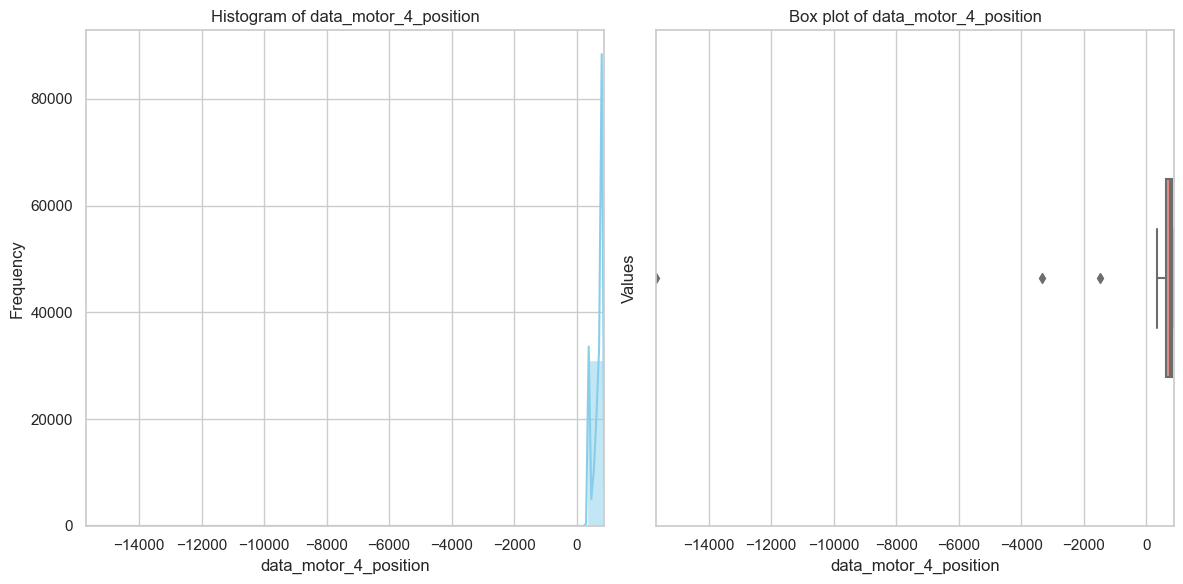

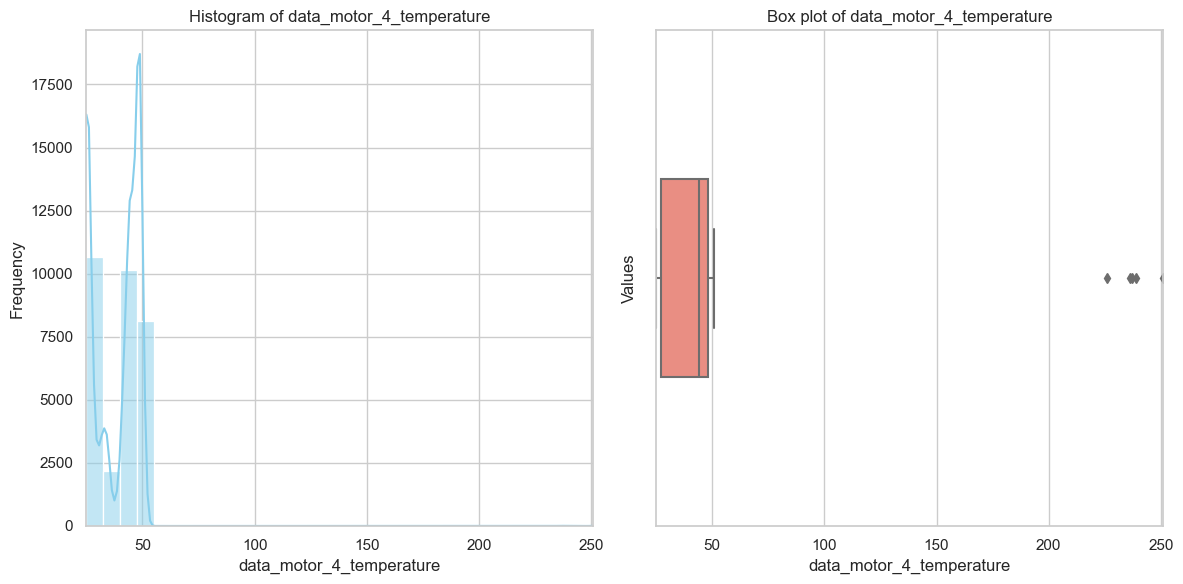

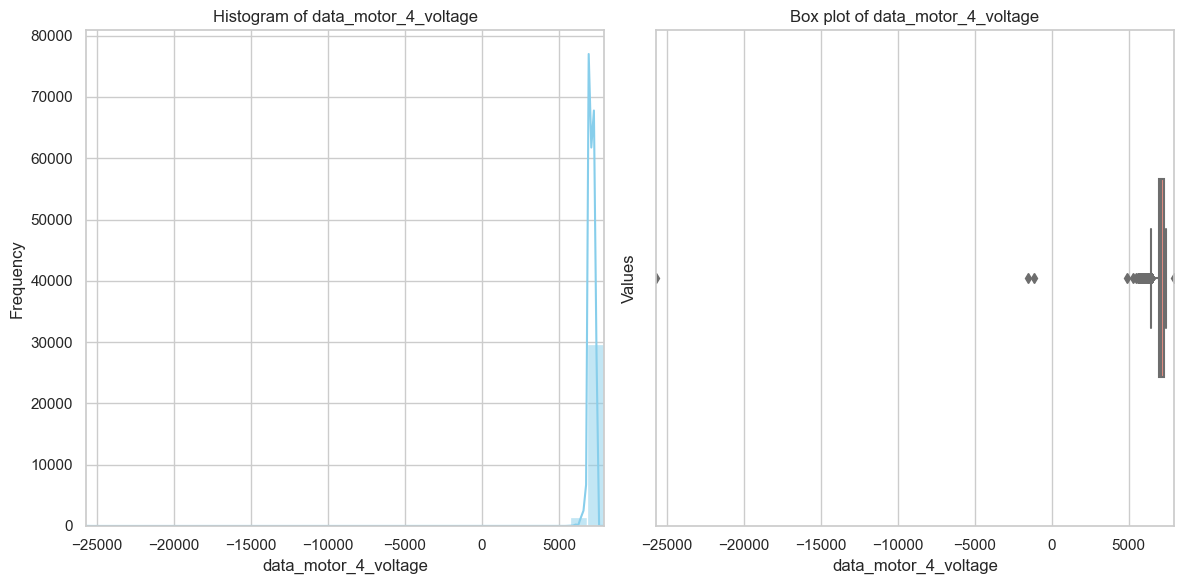

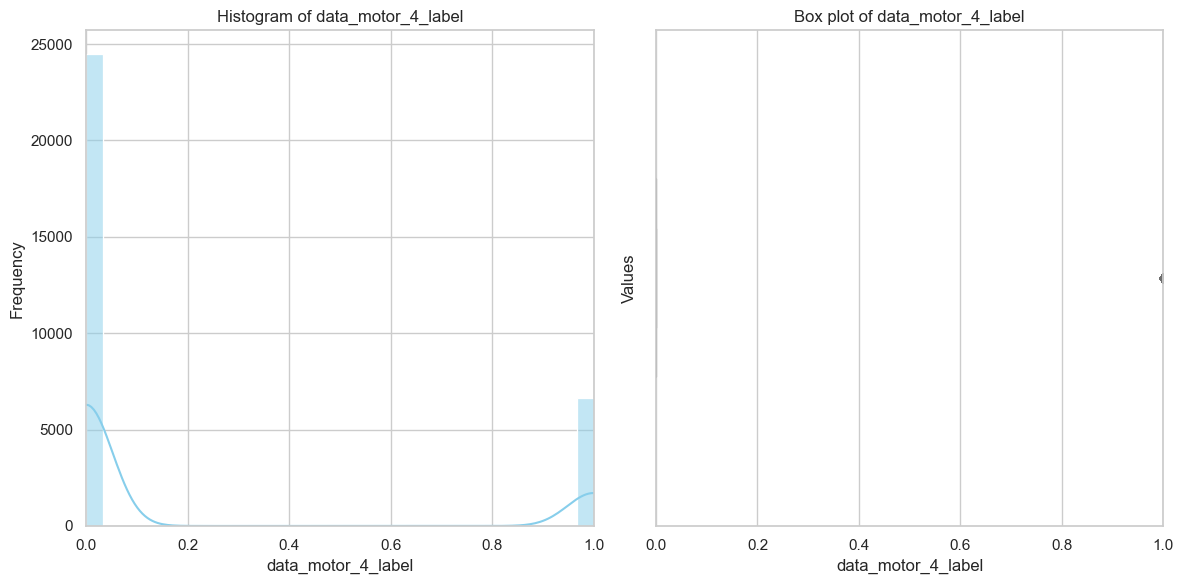

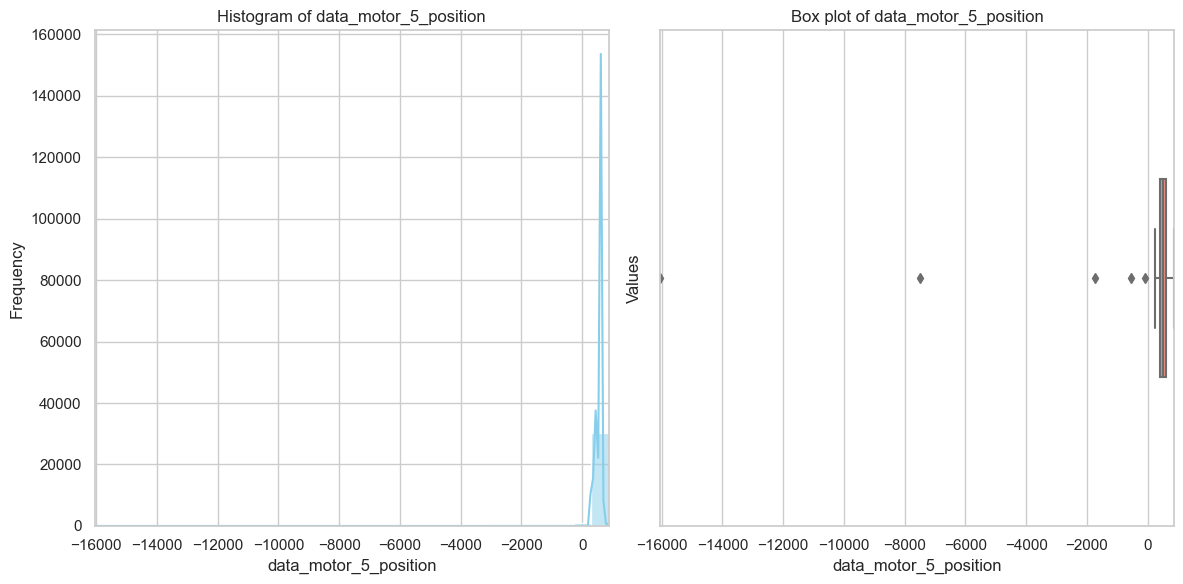

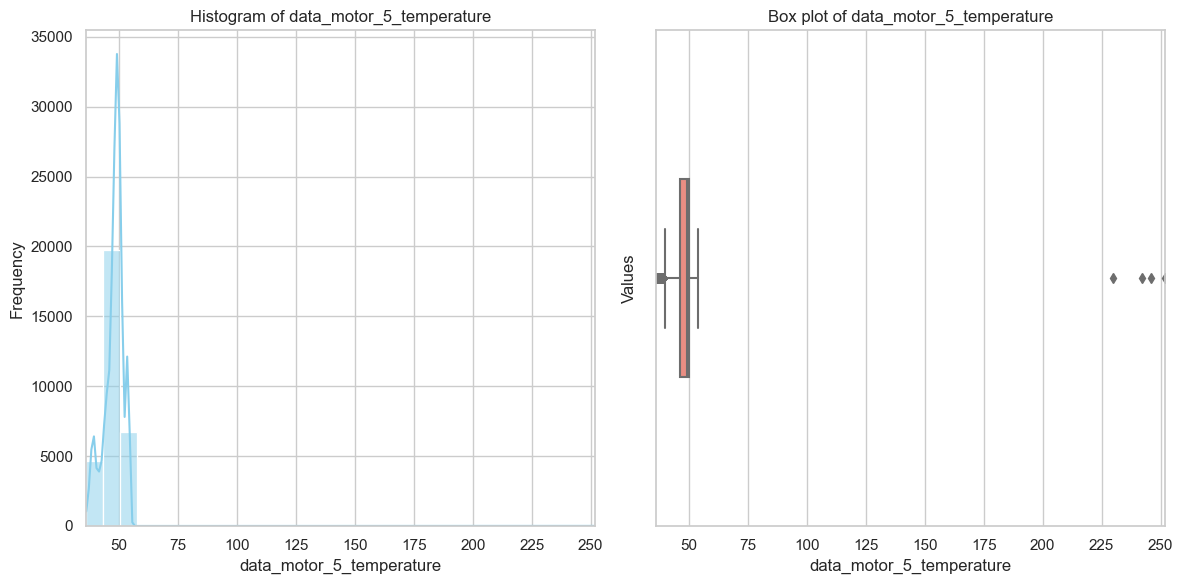

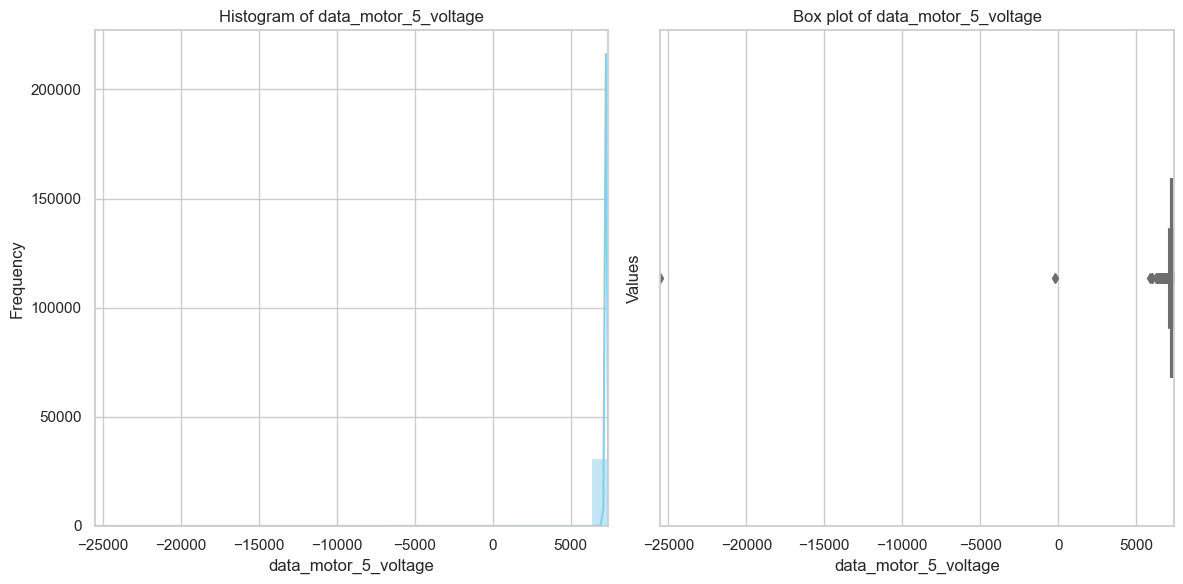

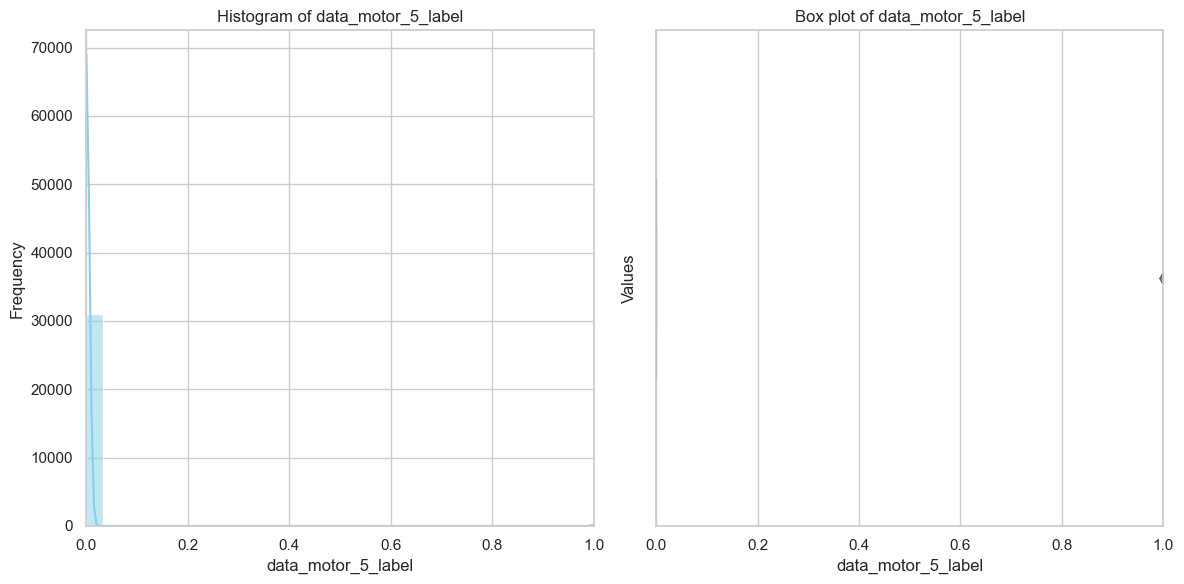

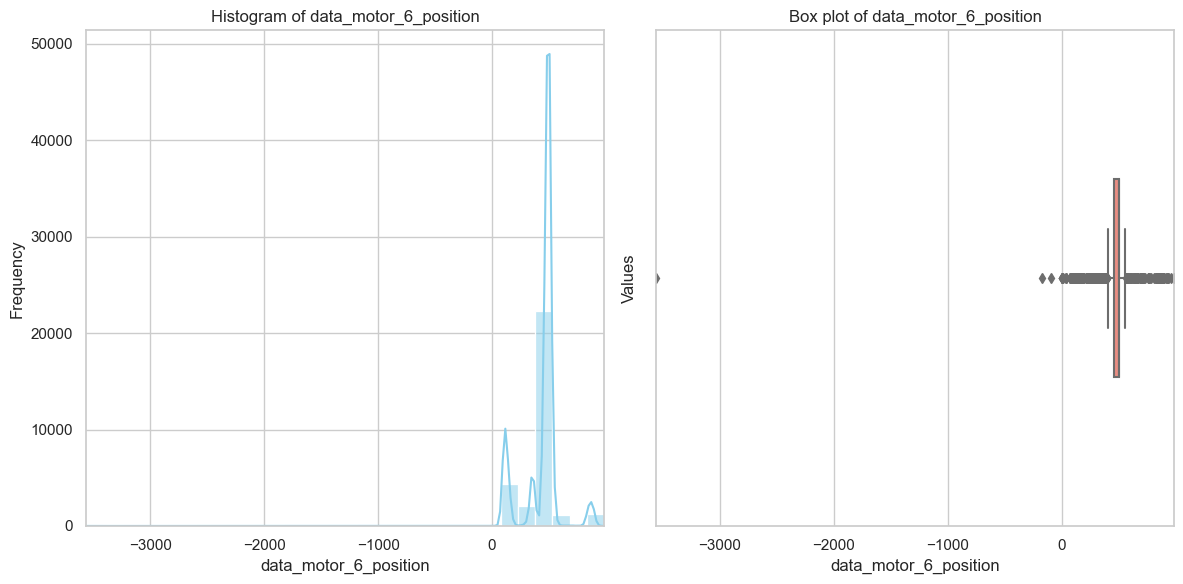

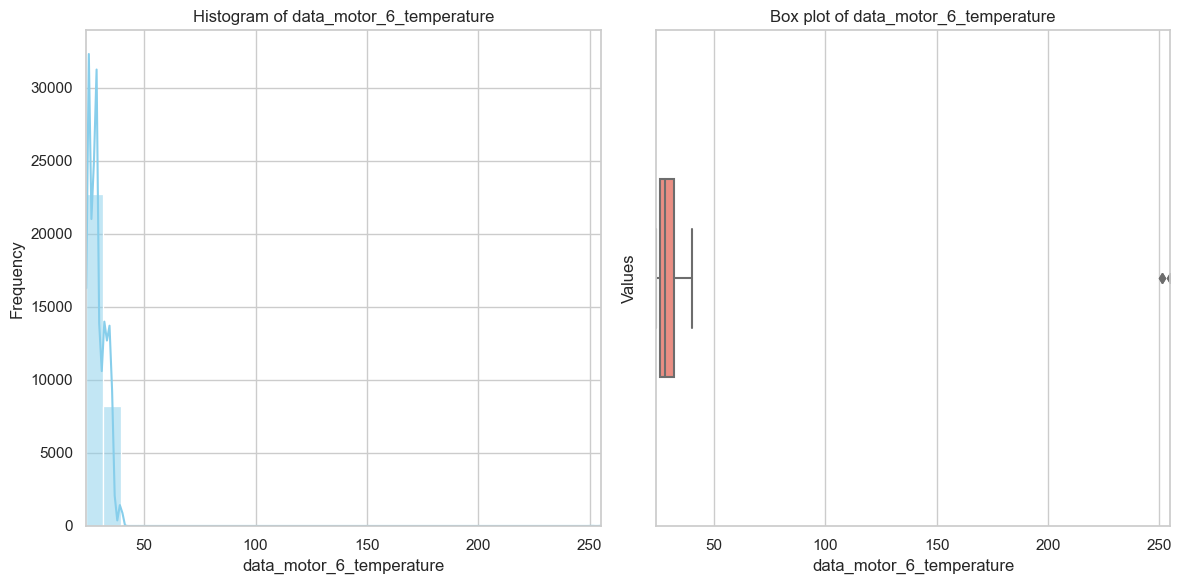

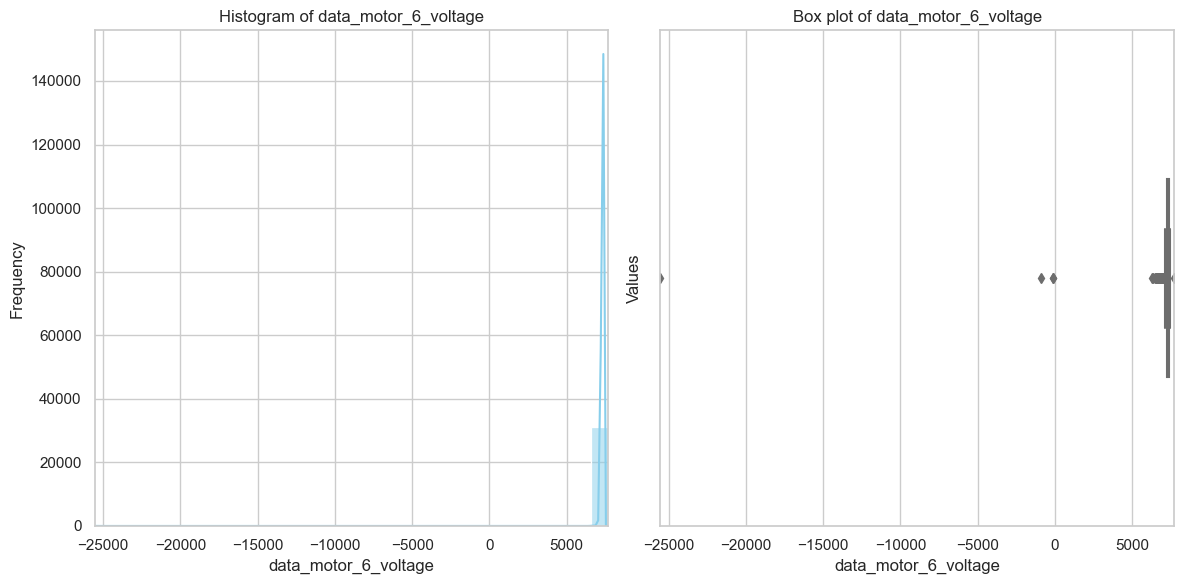

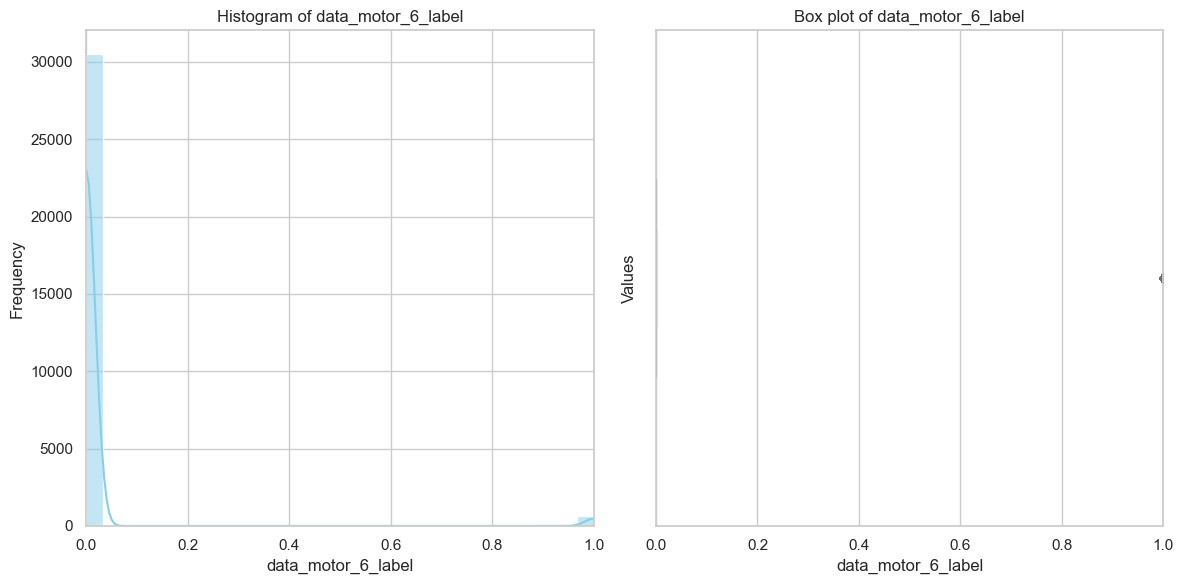

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_plot = df.columns[1:-1]

sns.set(style="whitegrid")

for column in columns_to_plot:
    min_val = df[column].min()
    max_val = df[column].max()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram
    sns.histplot(df, x=column, ax=axes[0], kde=True, color='skyblue', bins=30) 
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)  
    axes[0].set_ylabel('Frequency')  
    axes[0].set_xlim(min_val, max_val)  
    
    # Plot box plot
    sns.boxplot(x=df[column], ax=axes[1], color='salmon', width=0.4) 
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)  
    axes[1].set_ylabel('Values') 
    axes[1].set_xlim(min_val, max_val) 

    plt.tight_layout()
    plt.show()


## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

In [81]:
df[['time','data_motor_1_position']]

time  data_motor_1_position
0      76522.025433                     86
1      76522.125464                     86
2      76522.225432                     86
3      76522.325432                     86
4      76522.425451                     86
...             ...                    ...
31130  84966.426470                    195
31131  84966.526530                    195
31132  84966.626610                    195
31133  84966.726460                    195
31134  84966.826470                    195

[31135 rows x 2 columns]

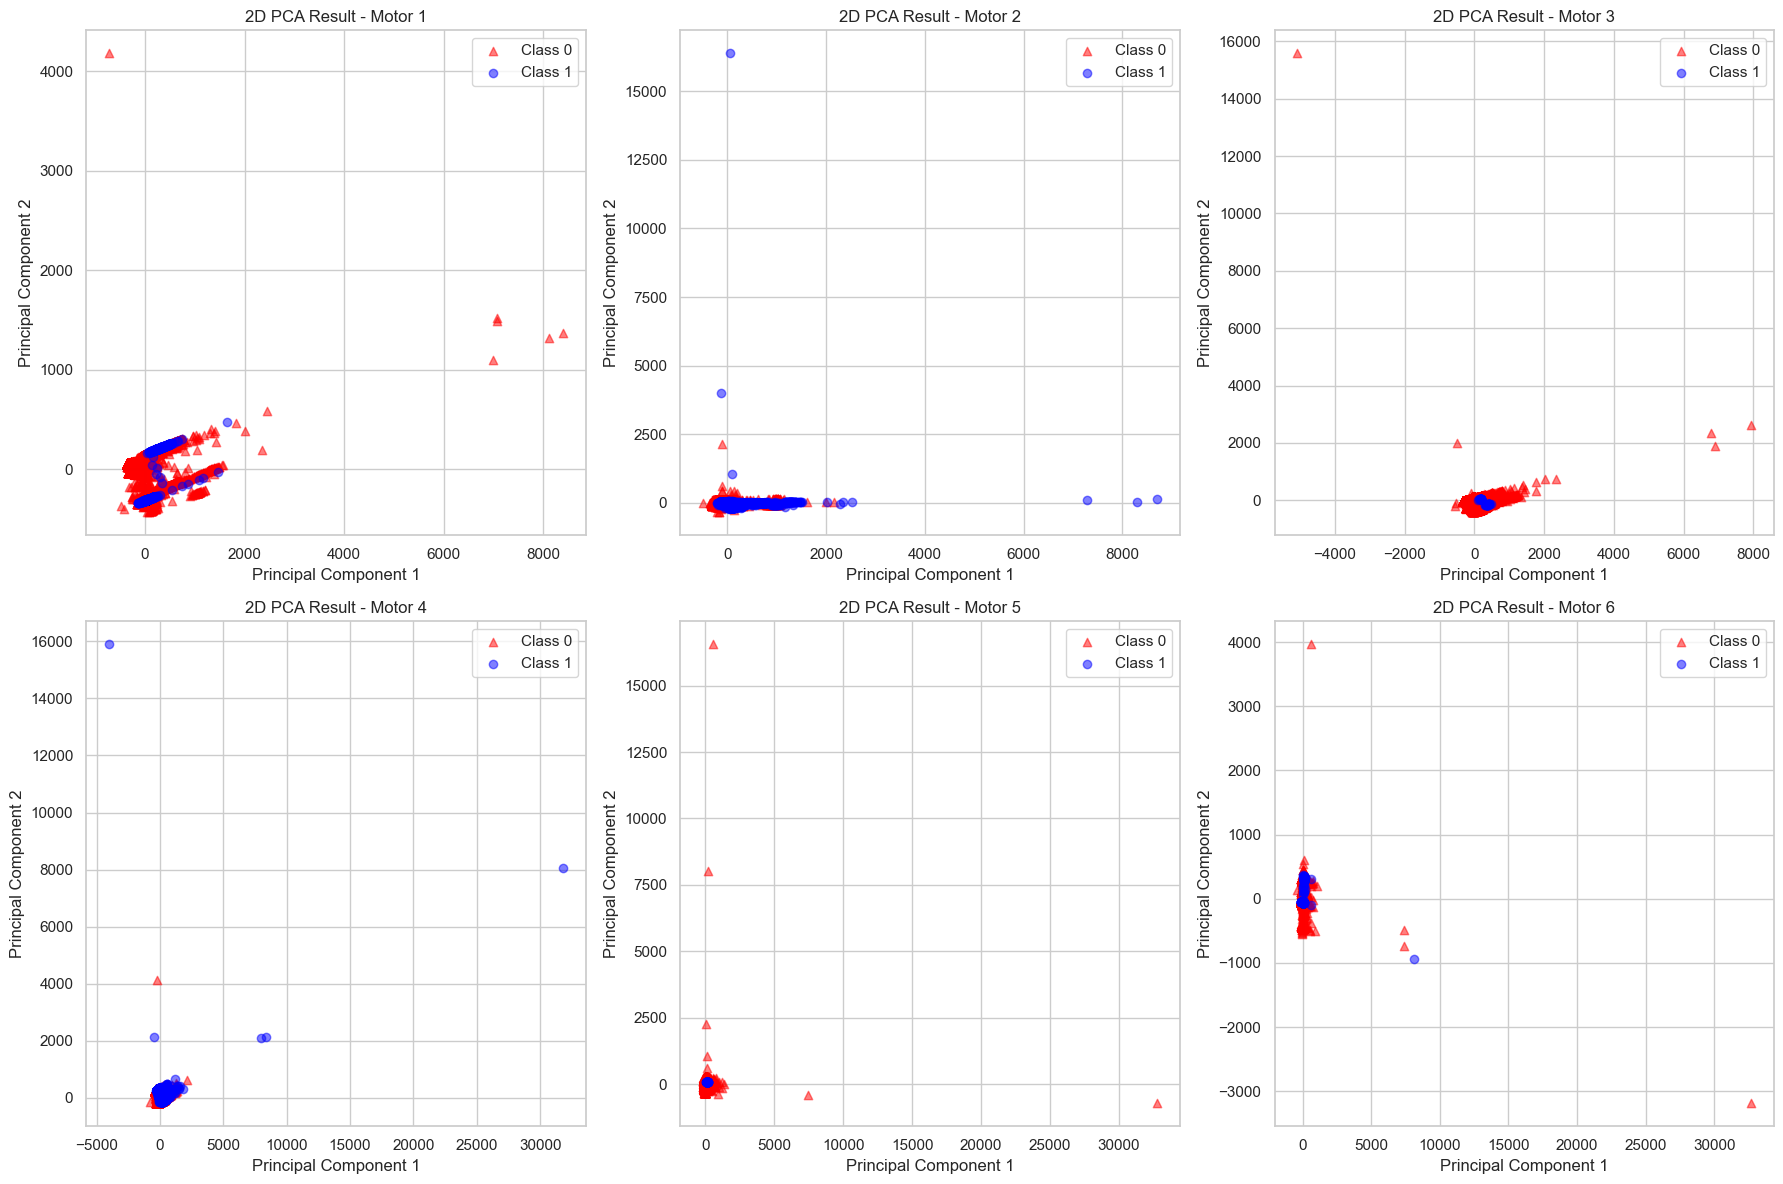

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame containing data for all motors

motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


### What can you see from the results?
What we can guess from the plot is that the data is not linearly separable if we only take 2 components.

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

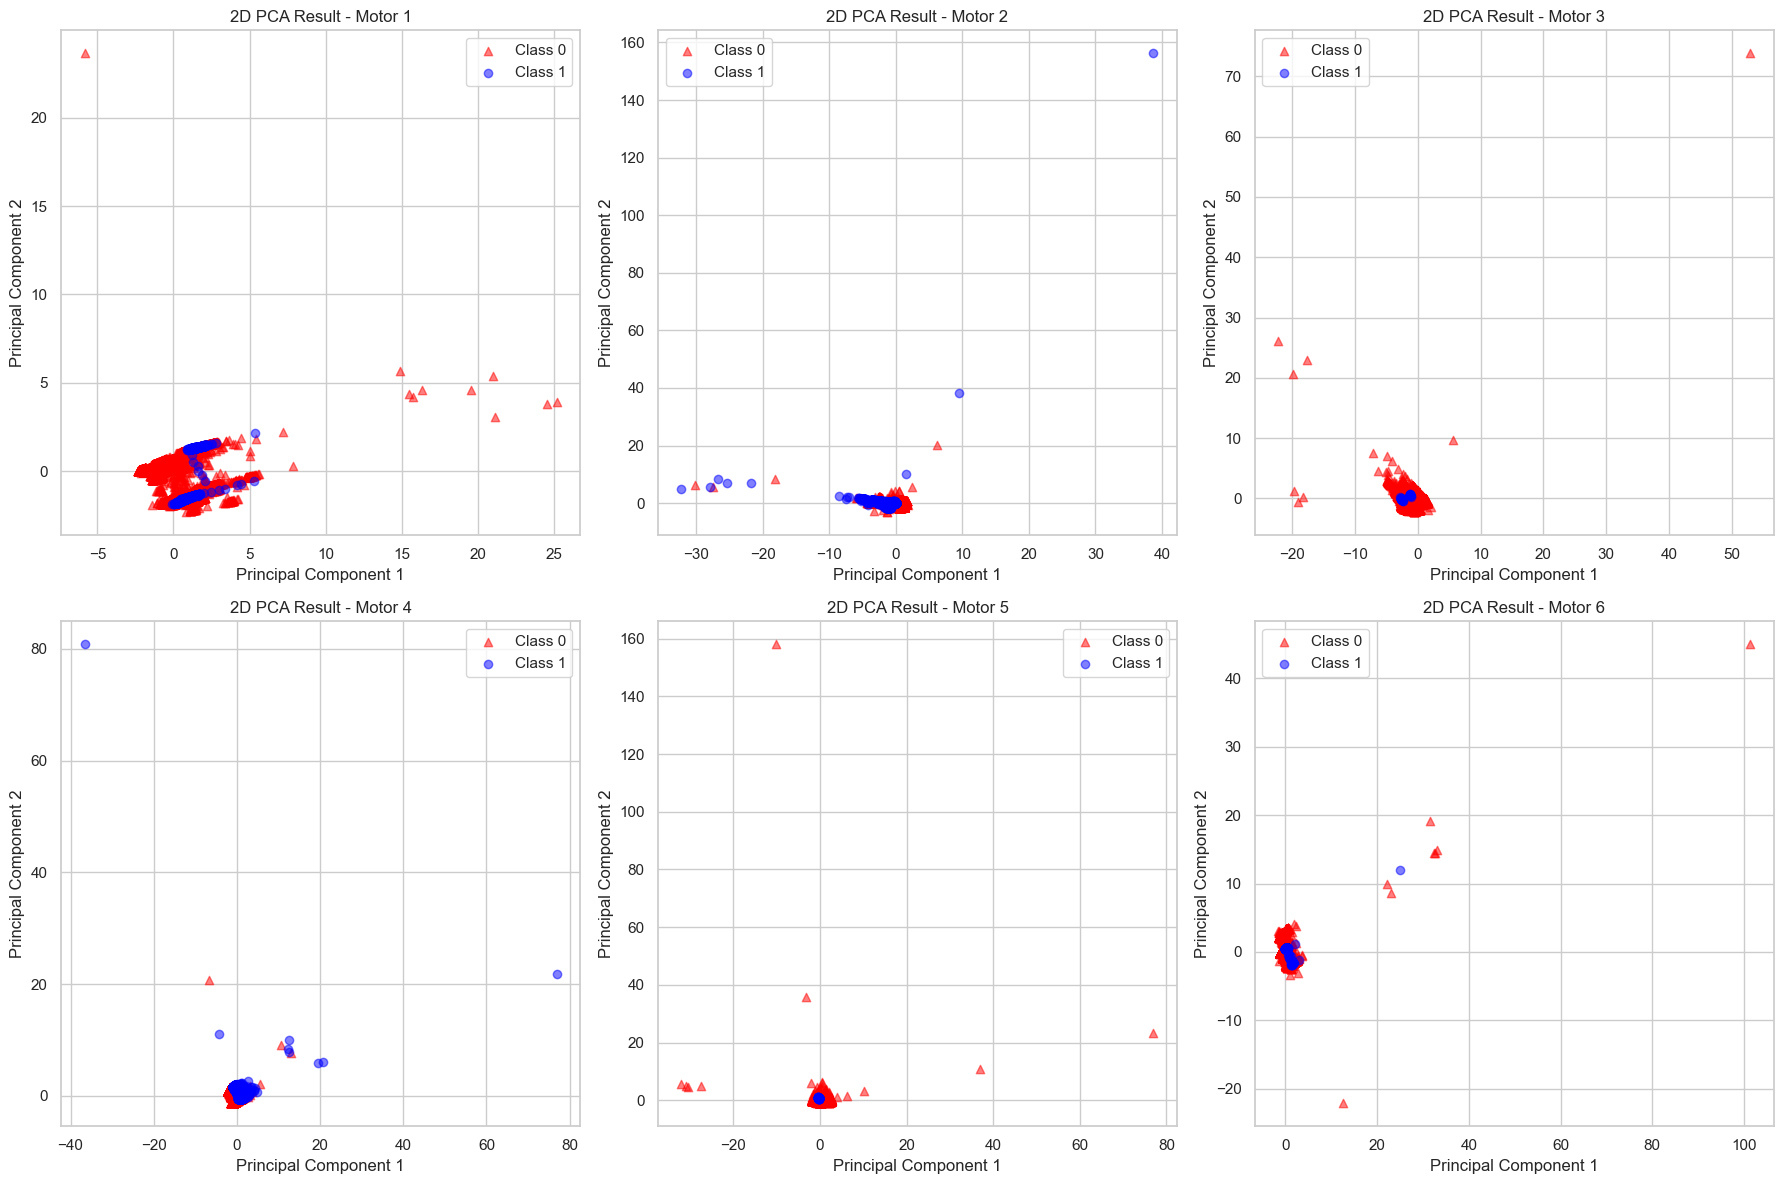

In [83]:
#Standardization : 
from sklearn.preprocessing import StandardScaler
motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


We can see that for both motors 2 and 4 the standardization nearly made the data linearly separable.

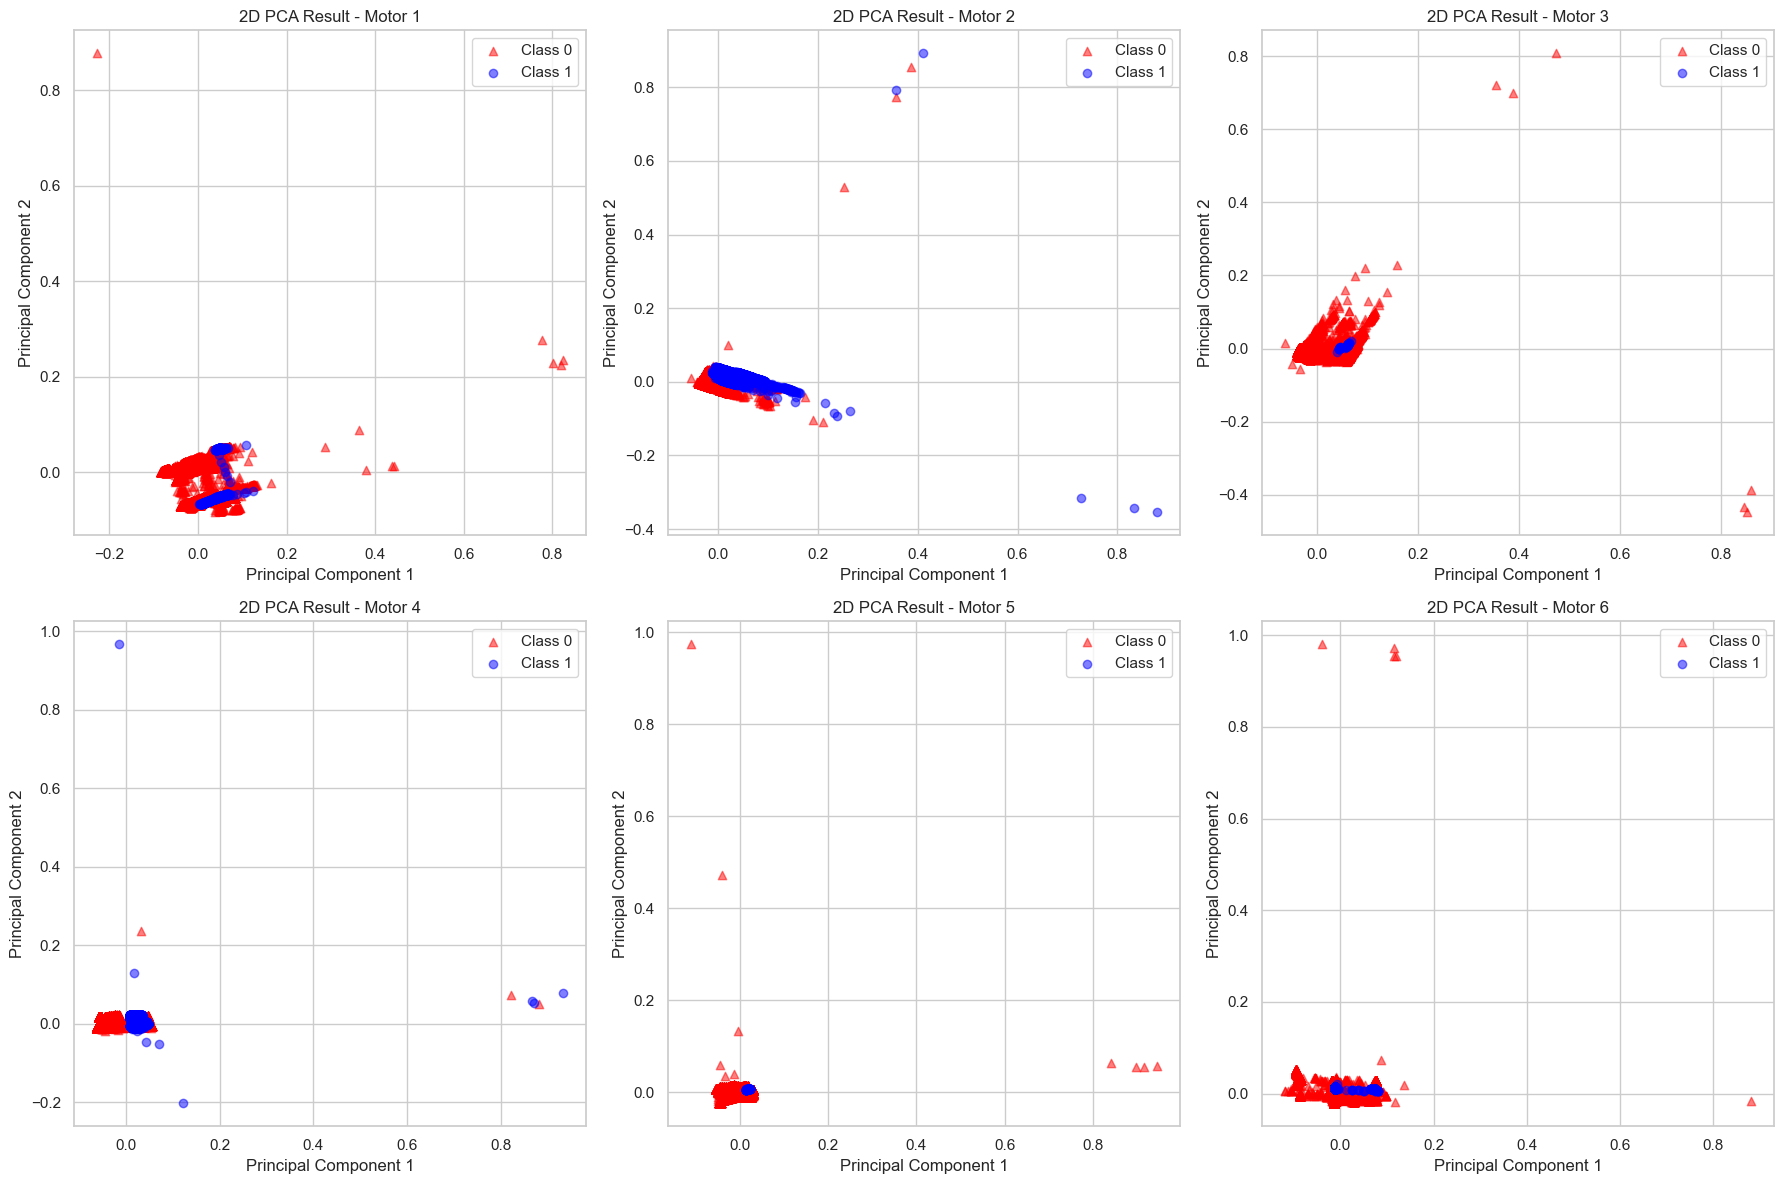

In [84]:
#Normalization : 
from sklearn.preprocessing import MinMaxScaler
motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


Once more, it's better than not normalizing the data. As a matter of fact, it seems better to normalize data for the motor 2 but it's better to standardize for motor 4. 

Anyway, we have to use the 3 components to separate the data because standardization/normalization doesn't work for motors 1, 3, 5 and 6.

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

In [151]:
col_to_clean = [col for col in df.columns if ('time' not in col and 'test' not in col and 'label' not in col)]
col_not_to_clean = [col for col in df.columns if not('time' not in col and 'test' not in col and 'label' not in col)]

df_scaled = df[col_to_clean].copy()

scaler = StandardScaler()
cols = df[col_to_clean].columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
df_scaled.columns = cols

df_scaled = pd.concat([df_scaled, df[col_not_to_clean]], axis=1)

data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage  \
0                  -0.534721                 -0.096173              0.869113   
1                  -0.534721                 -0.096173              0.832097   
2                  -0.534721                 -0.096173              0.515397   
3                  -0.534721                 -0.096173              0.507171   
4                  -0.534721                 -0.096173              0.823871   
...                      ...                       ...                   ...   
31130               0.091622                  1.094331              0.614108   
31131               0.091622                  1.094331              0.589430   
31132               0.091622                  1.094331              0.589430   
31133               0.091622                  1.094331              0.622334   
31134               0.091622                  1.094331              0.531849   

       data_motor_2_position  data_motor_2_temperature  data_motor_2_voltage  \
0                   0.015903                 -0.219292              0.938620   
1                   0.025741                 -0.219292              0.574769   
2                   0.015903                 -0.219292              0.505464   
3                   0.015903                 -0.219292              0.574769   
4                   0.025741                 -0.219292              0.496801   
...                      ...                       ...                   ...   
31130              -0.171018                  0.792184              0.639742   
31131              -0.171018                  0.792184              0.527122   
31132              -0.171018                  0.792184              0.557443   
31133              -0.171018                  0.792184              0.678726   
31134              -0.171018                  0.792184              0.622416   

       data_motor_3_position  data_motor_3_temperature  data_motor_3_voltage  \
0                  -0.411124                 -0.927496              0.724362   
1                  -0.411124                 -0.927496              0.692416   
2                  -0.417266                 -0.927496              0.724362   
3                  -0.417266                 -0.927496              0.783690   
4                  -0.417266                 -0.927496              0.651342   
...                      ...                       ...                   ...   
31130               1.105928                  0.260697              0.619396   
31131               1.112070                  0.260697              0.582886   
31132               1.112070                  0.260697              0.633087   
31133               1.112070                  0.260697              0.592013   
31134               1.112070                  0.260697              0.610268   

       data_motor_4_position  ...  data_motor_6_temperature  \
0                   0.638543  ...                 -1.126843   
1                   0.638543  ...                 -1.126843   
2                   0.638543  ...                 -1.126843   
3                   0.638543  ...                 -1.126843   
4                   0.633075  ...                 -1.126843   
...                      ...  ...                       ...   
31130              -1.805781  ...                  0.902021   
31131              -1.800313  ...                  0.902021   
31132              -1.800313  ...                  0.902021   
31133              -1.800313  ...                  0.902021   
31134              -1.800313  ...                  0.902021   

       data_motor_6_voltage          time  data_motor_1_label  \
0                  0.264414  76522.025433                   0   
1                  0.316707  76522.125464                   0   
2                  0.240645  76522.225432                   0   
3                  0.326215  76522.325432                   0   
4                  0.283430  76522.425451 

We chose to standradize the data because we have lots of outliers and the historigrams look like gaussian curves.

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

In [152]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31135 entries, 0 to 31134
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_motor_1_position     31135 non-null  float64
 1   data_motor_1_temperature  31135 non-null  float64
 2   data_motor_1_voltage      31135 non-null  float64
 3   data_motor_2_position     31135 non-null  float64
 4   data_motor_2_temperature  31135 non-null  float64
 5   data_motor_2_voltage      31135 non-null  float64
 6   data_motor_3_position     31135 non-null  float64
 7   data_motor_3_temperature  31135 non-null  float64
 8   data_motor_3_voltage      31135 non-null  float64
 9   data_motor_4_position     31135 non-null  float64
 10  data_motor_4_temperature  31135 non-null  float64
 11  data_motor_4_voltage      31135 non-null  float64
 12  data_motor_5_position     31135 non-null  float64
 13  data_motor_5_temperature  31135 non-null  float64
 14  data_m

In [153]:
col_to_clean = [col for col in df_scaled.columns if ('time' not in col and 'test' not in col and 'label' not in col)]
cleaned_df = df_scaled.copy()

for column in col_to_clean : 
    Q1 = df_scaled[column].quantile(0.25)
    Q3 = df_scaled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_df[column]= np.where(cleaned_df[column] > upper_bound, upper_bound, cleaned_df[column])
    cleaned_df[column] = np.where(cleaned_df[column] < lower_bound, lower_bound, cleaned_df[column])
    


By removing all the outlier, we delete slightly more than 60% of the data which is too much. We lose lots of data beacuse for example when motor 1 has an outlier et time t_0, we are also going to delete the data of all other motors at time t_0, even if there are no outliers. 
Thus, to solve this issue, we replace the value of the outliers to the theoretical max/min of a set of data. 

Here we notice the new data are not standardized like shows the previous cell, so we have to do it again. 

In [154]:
cleaned_df

data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage  \
0                  -0.534721                 -0.096173              0.869113   
1                  -0.534721                 -0.096173              0.832097   
2                  -0.534721                 -0.096173              0.515397   
3                  -0.534721                 -0.096173              0.507171   
4                  -0.534721                 -0.096173              0.823871   
...                      ...                       ...                   ...   
31130               0.091622                  1.094331              0.614108   
31131               0.091622                  1.094331              0.589430   
31132               0.091622                  1.094331              0.589430   
31133               0.091622                  1.094331              0.622334   
31134               0.091622                  1.094331              0.531849   

       data_motor_2_position  data_motor_2_temperature  data_motor_2_voltage  \
0                   0.015903                 -0.219292              0.938620   
1                   0.025741                 -0.219292              0.574769   
2                   0.015903                 -0.219292              0.505464   
3                   0.015903                 -0.219292              0.574769   
4                   0.025741                 -0.219292              0.496801   
...                      ...                       ...                   ...   
31130               0.001146                  0.792184              0.639742   
31131               0.001146                  0.792184              0.527122   
31132               0.001146                  0.792184              0.557443   
31133               0.001146                  0.792184              0.678726   
31134               0.001146                  0.792184              0.622416   

       data_motor_3_position  data_motor_3_temperature  data_motor_3_voltage  \
0                  -0.411124                 -0.927496              0.724362   
1                  -0.411124                 -0.927496              0.692416   
2                  -0.417266                 -0.927496              0.724362   
3                  -0.417266                 -0.927496              0.783690   
4                  -0.417266                 -0.927496              0.651342   
...                      ...                       ...                   ...   
31130               0.718988                  0.260697              0.619396   
31131               0.718988                  0.260697              0.582886   
31132               0.718988                  0.260697              0.633087   
31133               0.718988                  0.260697              0.592013   
31134               0.718988                  0.260697              0.610268   

       data_motor_4_position  ...  data_motor_6_temperature  \
0                   0.638543  ...                 -1.126843   
1                   0.638543  ...                 -1.126843   
2                   0.638543  ...                 -1.126843   
3                   0.638543  ...                 -1.126843   
4                   0.633075  ...                 -1.126843   
...                      ...  ...                       ...   
31130              -1.805781  ...                  0.902021   
31131              -1.800313  ...                  0.902021   
31132              -1.800313  ...                  0.902021   
31133              -1.800313  ...                  0.902021   
31134              -1.800313  ...                  0.902021   

       data_motor_6_voltage          time  data_motor_1_label  \
0                  0.264414  76522.025433                   0   
1                  0.316707  76522.125464                   0   
2                  0.240645  76522.225432                   0   
3                  0.326215  76522.325432                   0   
4                  0.283430  76522.425451 

In [155]:
cleaned_df_scaled = cleaned_df[col_to_clean].copy()

scaler = StandardScaler()
cols = cleaned_df[col_to_clean].columns
cleaned_df_scaled = pd.DataFrame(scaler.fit_transform(cleaned_df_scaled))
cleaned_df_scaled.columns = cols

cleaned_df_scaled = pd.concat([cleaned_df_scaled, cleaned_df[col_not_to_clean]], axis=1)

cleaned_df_scaled

data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage  \
0                  -0.540430                 -0.096822              0.995246   
1                  -0.540430                 -0.096822              0.951862   
2                  -0.540430                 -0.096822              0.580687   
3                  -0.540430                 -0.096822              0.571046   
4                  -0.540430                 -0.096822              0.942221   
...                      ...                       ...                   ...   
31130               0.091819                  1.134334              0.696378   
31131               0.091819                  1.134334              0.667456   
31132               0.091819                  1.134334              0.667456   
31133               0.091819                  1.134334              0.706019   
31134               0.091819                  1.134334              0.599969   

       data_motor_2_position  data_motor_2_temperature  data_motor_2_voltage  \
0                  -0.252495                 -0.247107              1.050692   
1                   0.511826                 -0.247107              0.635430   
2                  -0.252495                 -0.247107              0.556332   
3                  -0.252495                 -0.247107              0.635430   
4                   0.511826                 -0.247107              0.546445   
...                      ...                       ...                   ...   
31130              -1.398975                  0.924422              0.709584   
31131              -1.398975                  0.924422              0.581050   
31132              -1.398975                  0.924422              0.615655   
31133              -1.398975                  0.924422              0.754076   
31134              -1.398975                  0.924422              0.689809   

       data_motor_3_position  data_motor_3_temperature  data_motor_3_voltage  \
0                  -0.505309                 -0.963896              0.789881   
1                  -0.505309                 -0.963896              0.754443   
2                  -0.517790                 -0.963896              0.789881   
3                  -0.517790                 -0.963896              0.855694   
4                  -0.517790                 -0.963896              0.708880   
...                      ...                       ...                   ...   
31130               1.791259                  0.274211              0.673442   
31131               1.791259                  0.274211              0.632942   
31132               1.791259                  0.274211              0.688630   
31133               1.791259                  0.274211              0.643067   
31134               1.791259                  0.274211              0.663317   

       data_motor_4_position  ...  data_motor_6_temperature  \
0                   0.747097  ...                 -1.365813   
1                   0.747097  ...                 -1.365813   
2                   0.747097  ...                 -1.365813   
3                   0.747097  ...                 -1.365813   
4                   0.740661  ...                 -1.365813   
...                      ...  ...                       ...   
31130              -2.129805  ...                  1.106786   
31131              -2.123369  ...                  1.106786   
31132              -2.123369  ...                  1.106786   
31133              -2.123369  ...                  1.106786   
31134              -2.123369  ...                  1.106786   

       data_motor_6_voltage          time  data_motor_1_label  \
0                  0.913513  76522.025433                   0   
1                  1.103231  76522.125464                   0   
2                  0.827278  76522.225432                   0   
3                  1.137725  76522.325432                   0   
4                  0.982502  76522.425451 

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

In [157]:
window_size = 3  
df_smooth = cleaned_df_scaled.copy()
for col in col_to_clean:
    smoothed_values = cleaned_df_scaled[col].rolling(window=window_size).mean()
    
    df_smooth[col] = smoothed_values


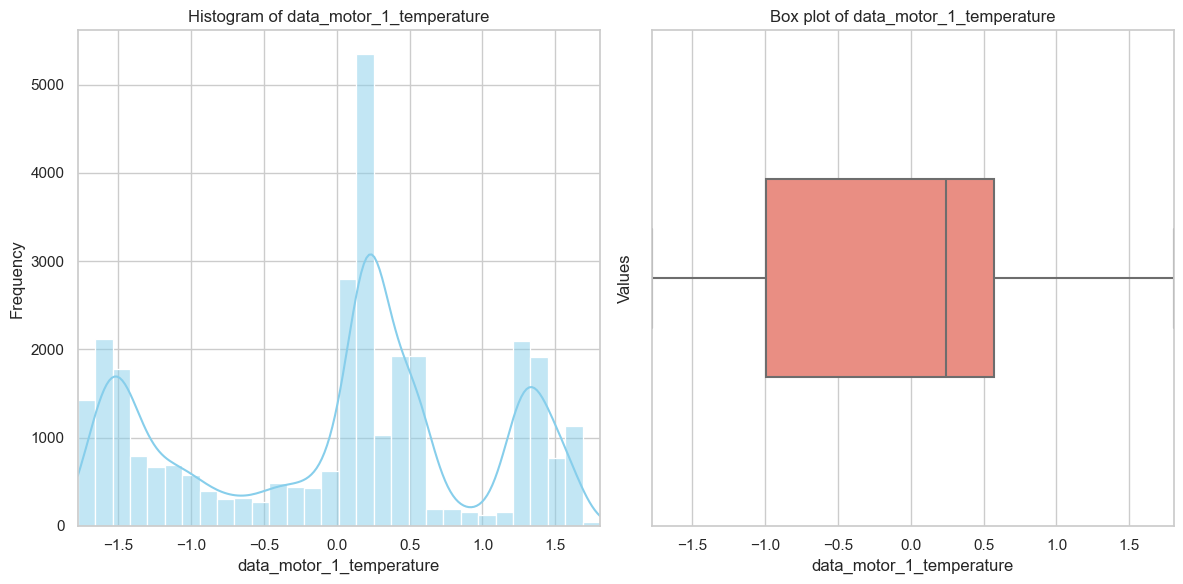

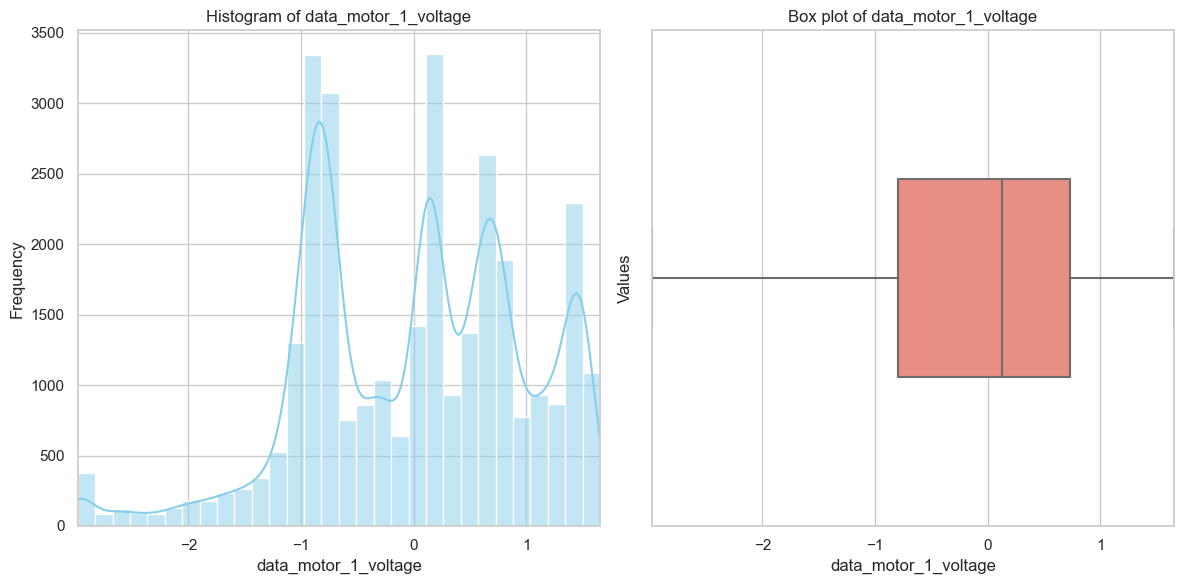

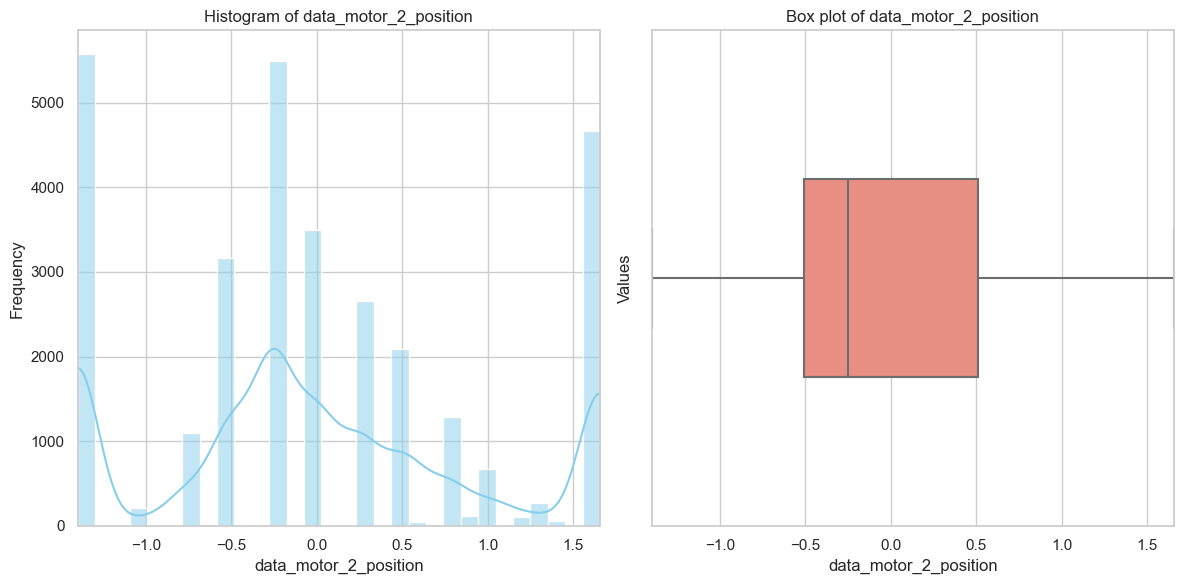

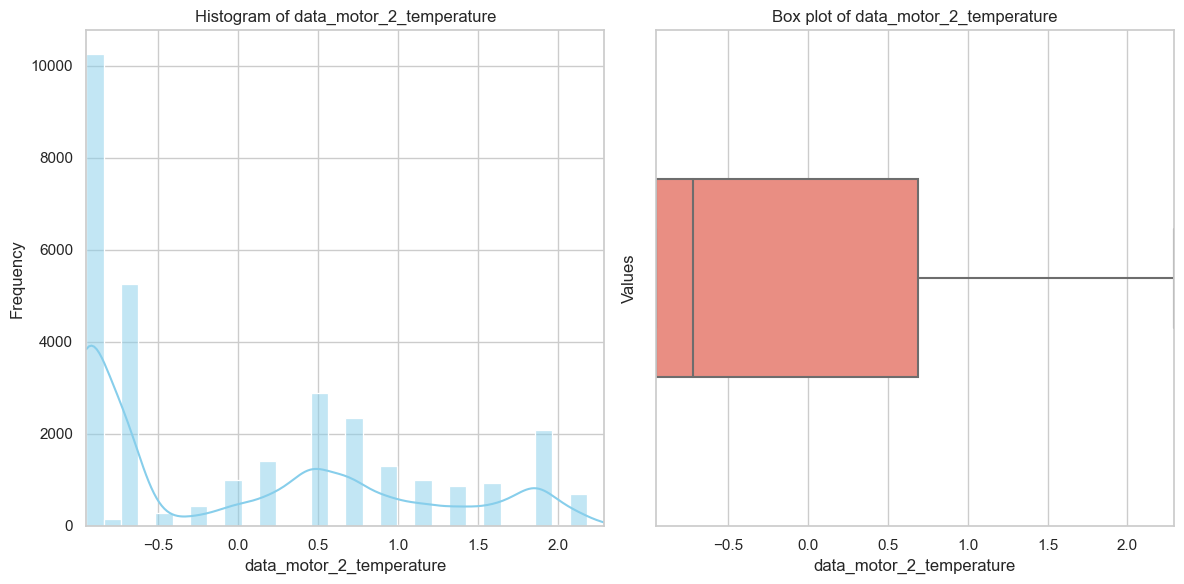

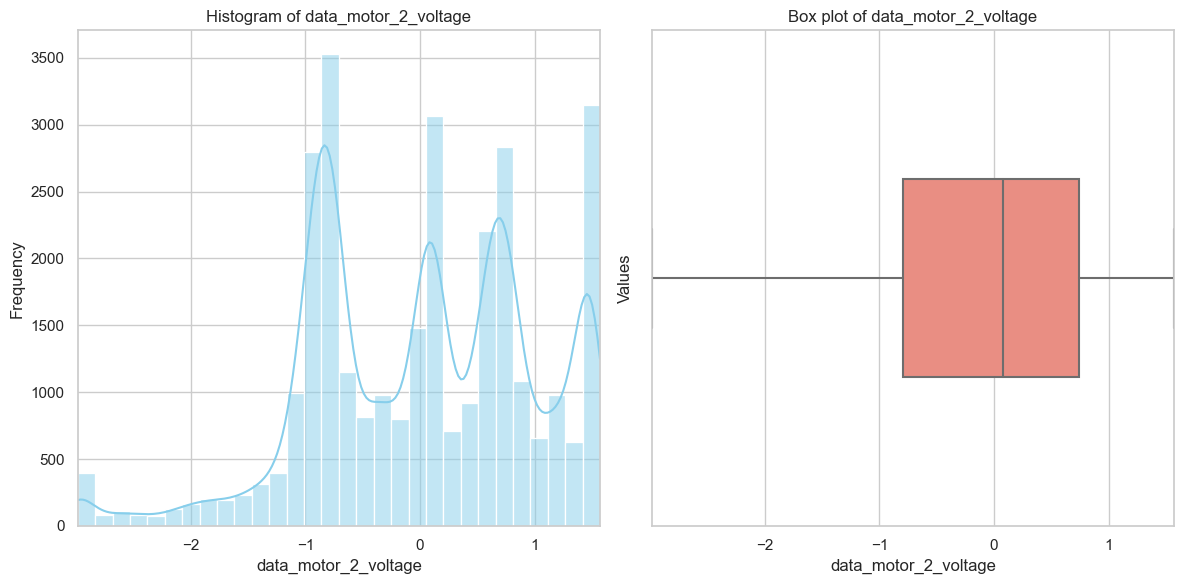

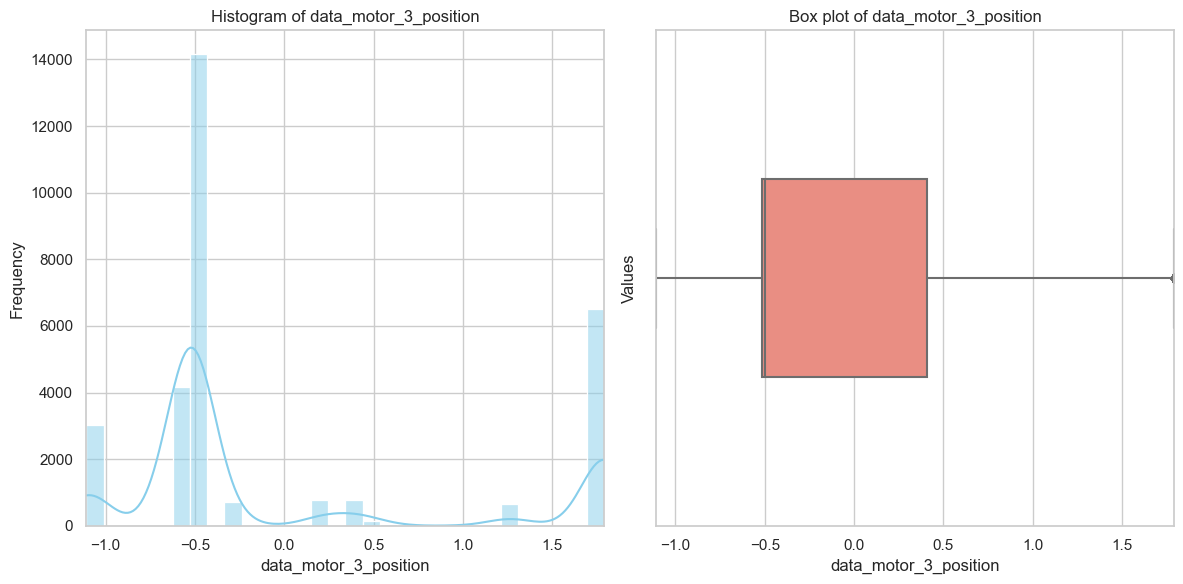

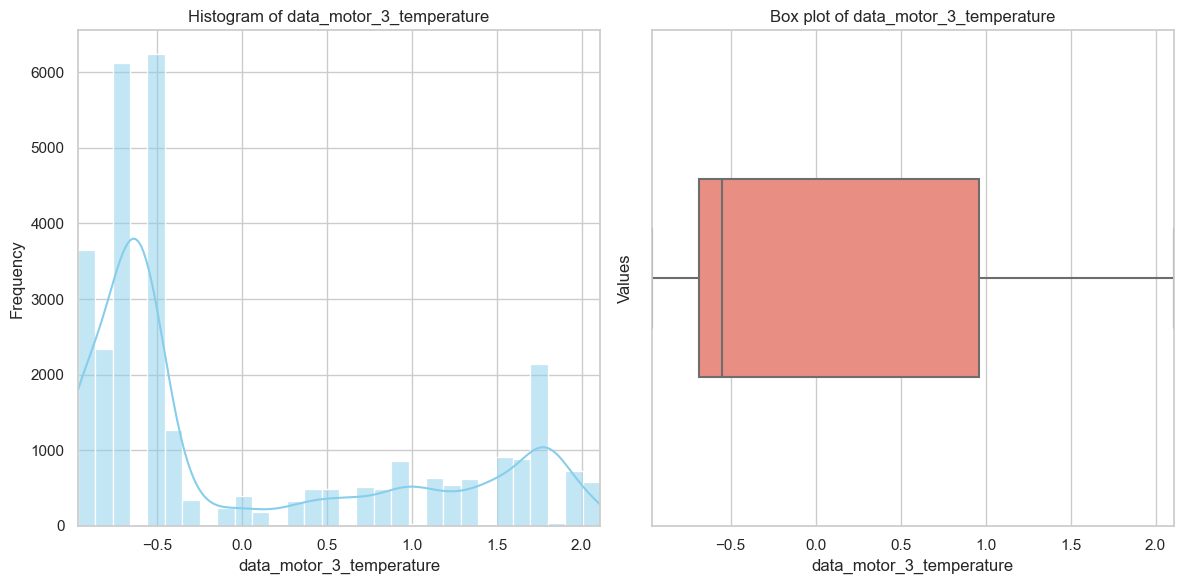

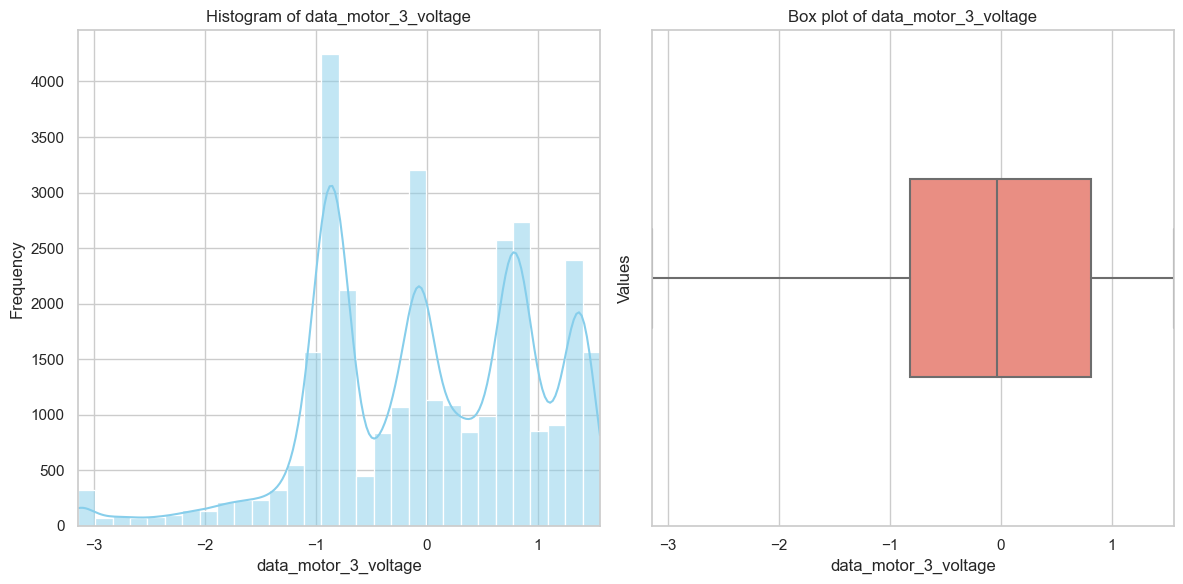

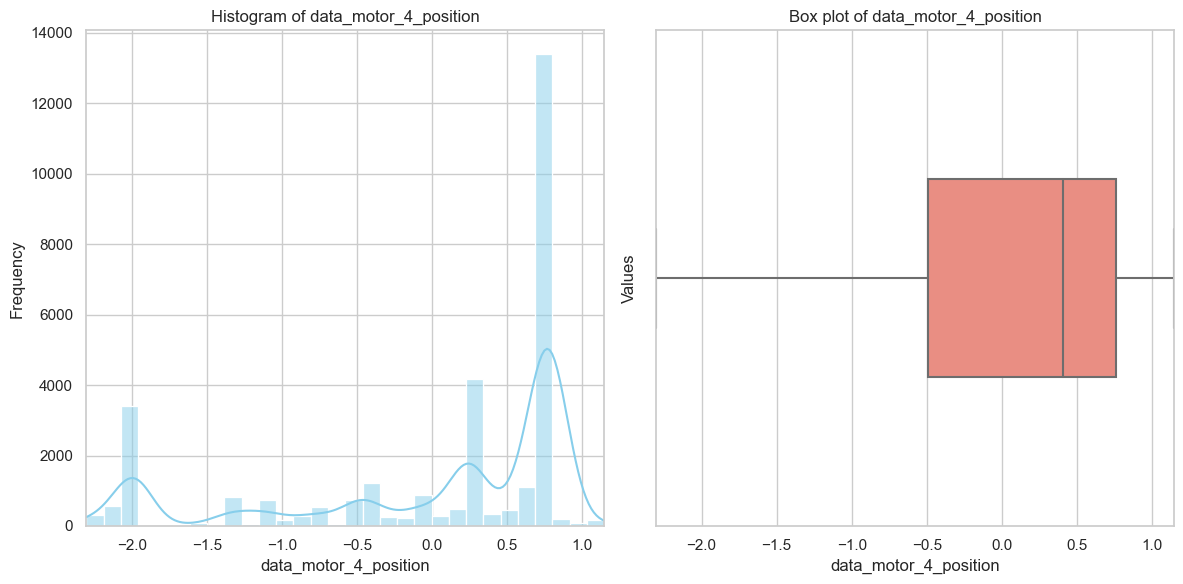

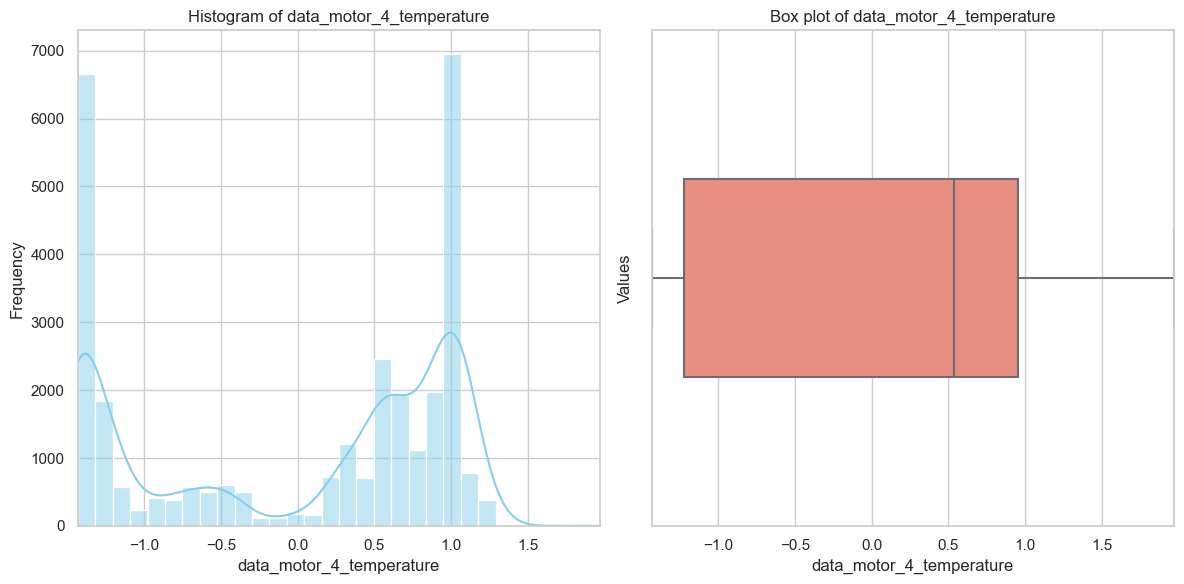

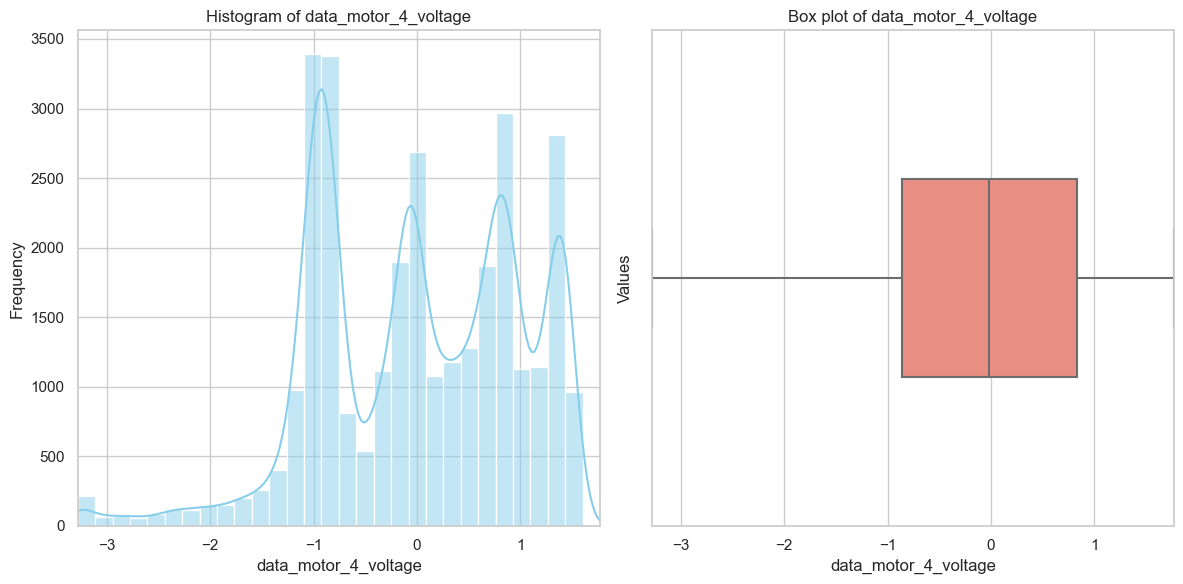

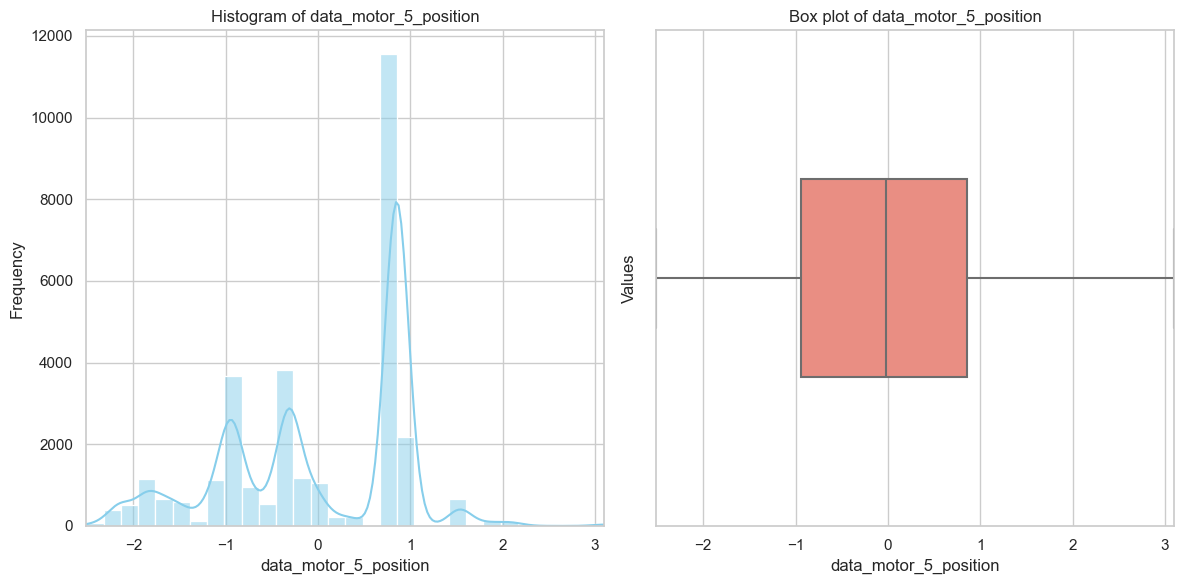

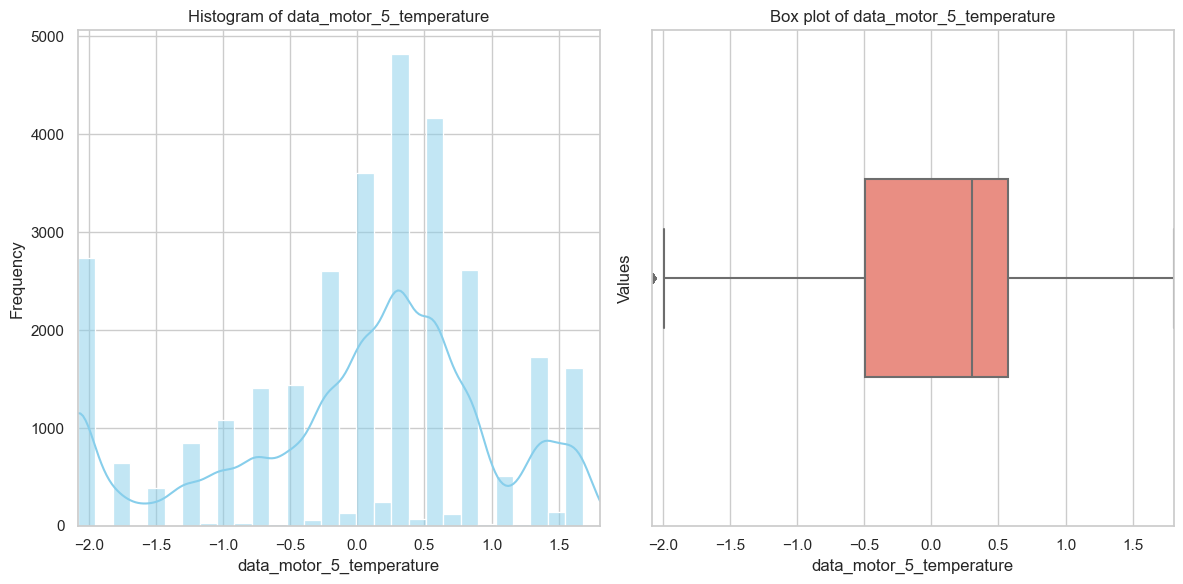

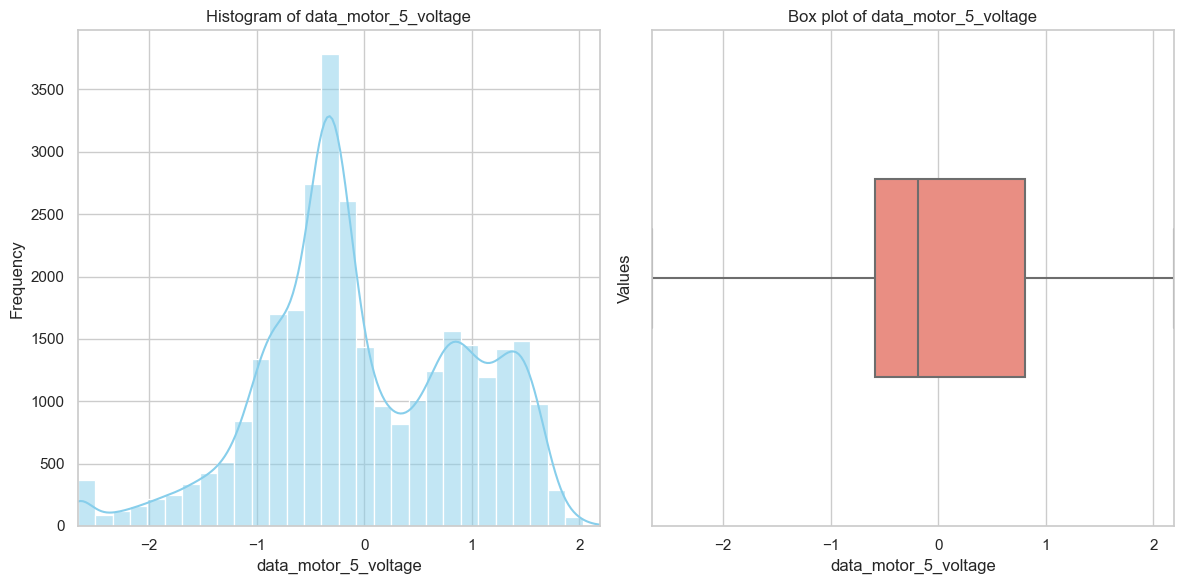

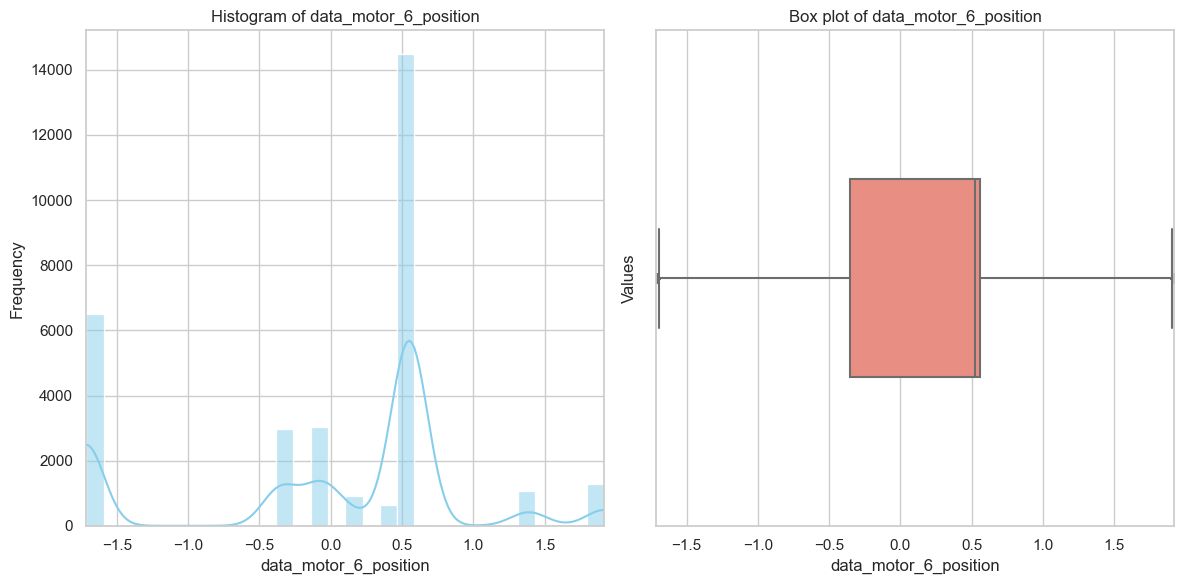

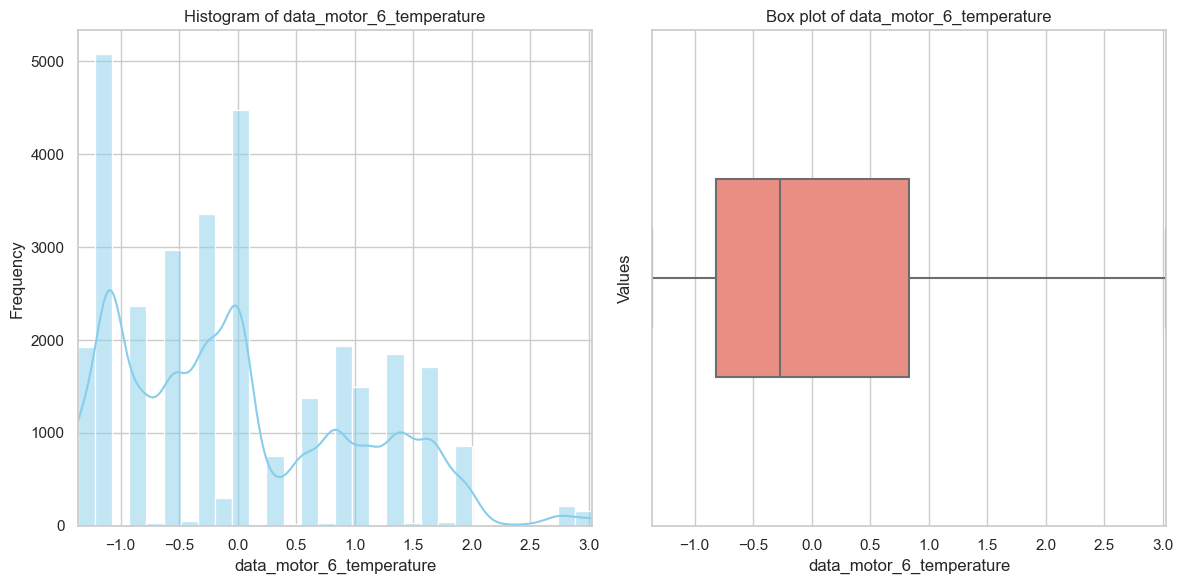

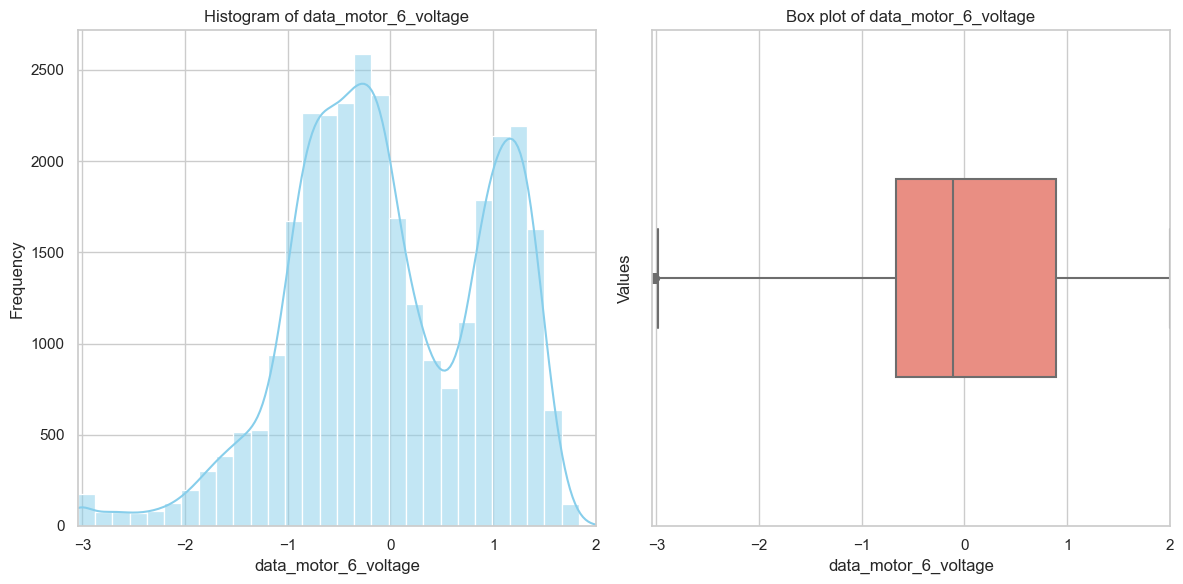

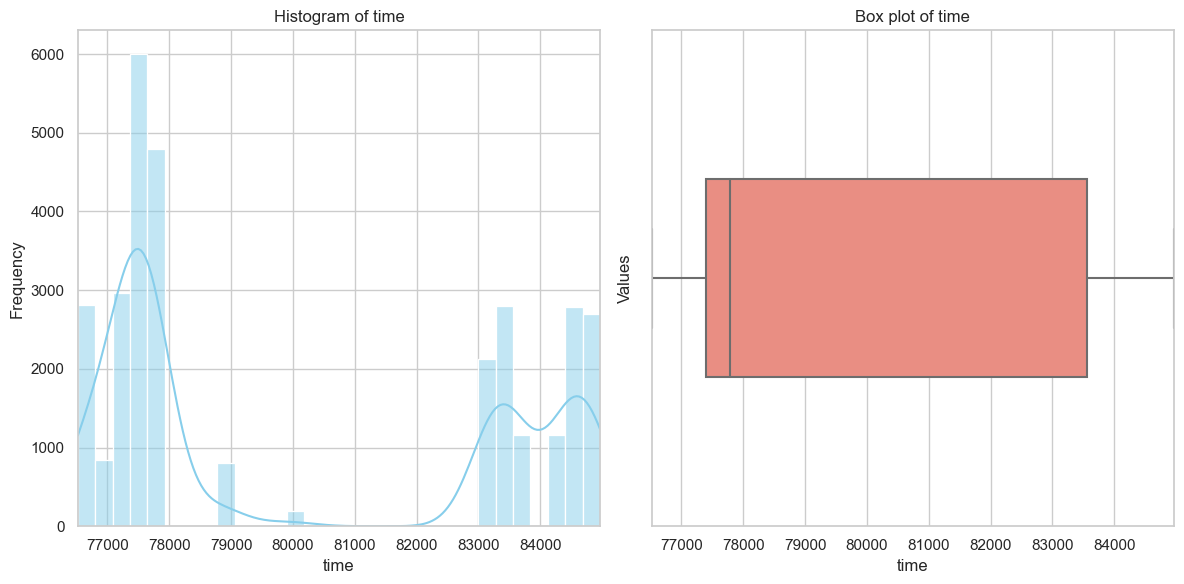

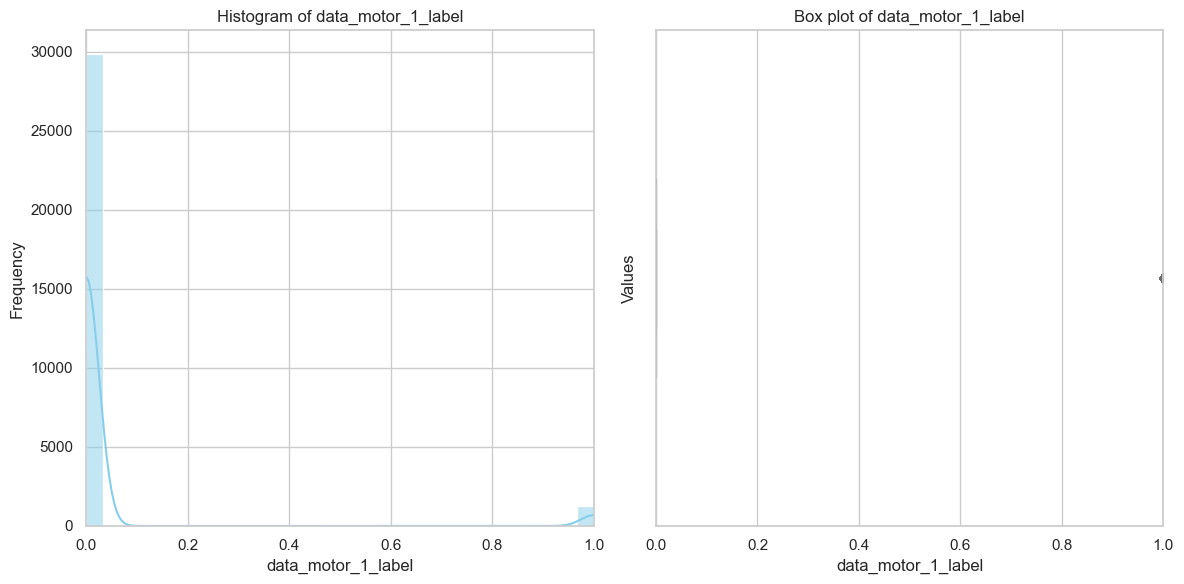

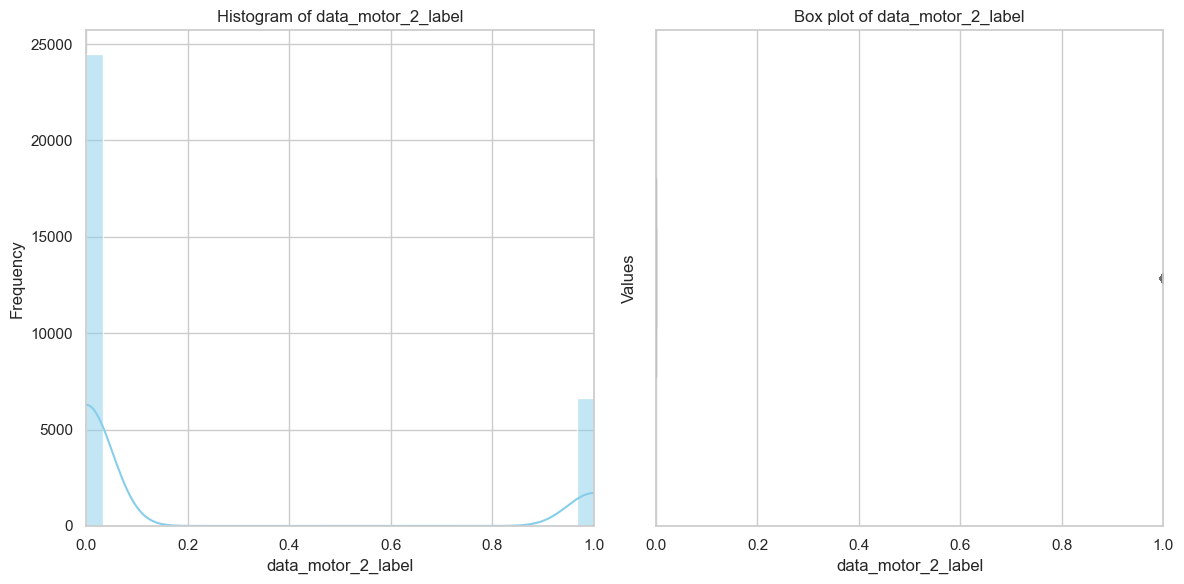

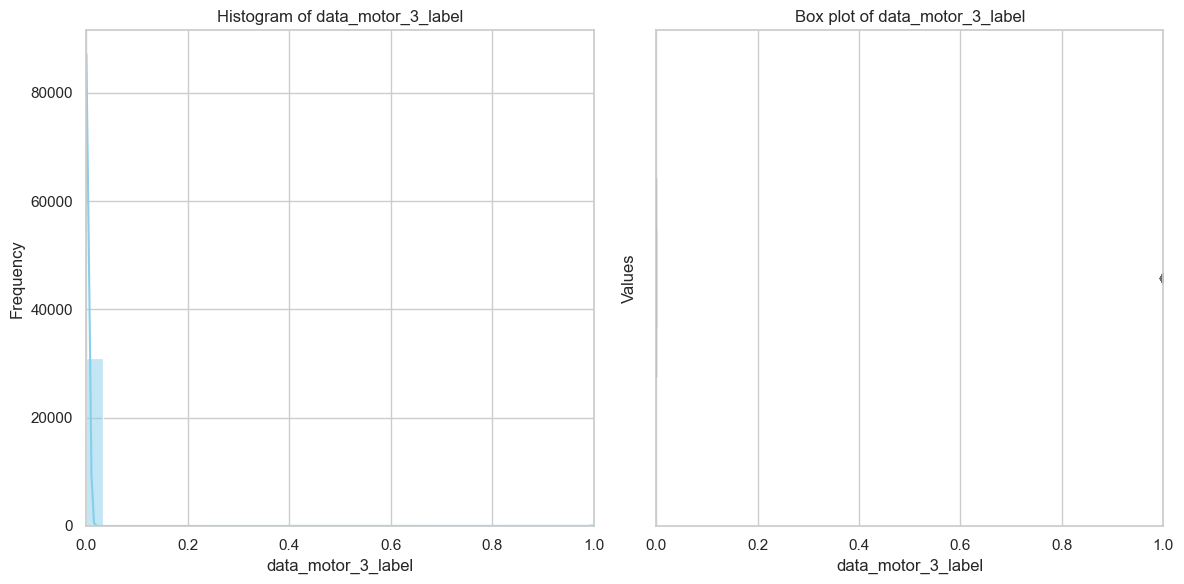

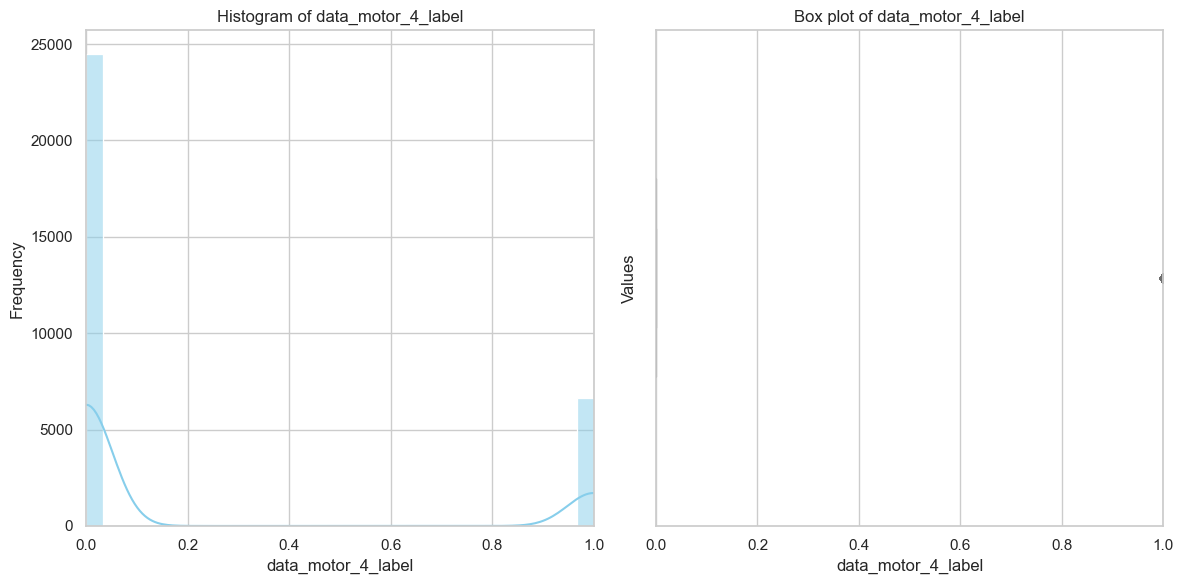

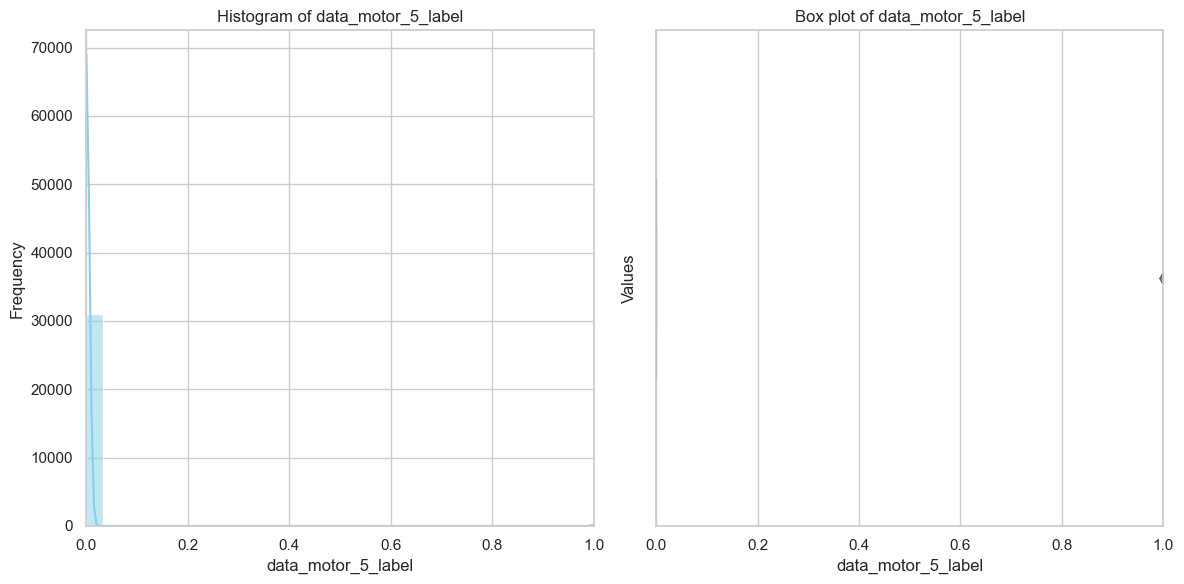

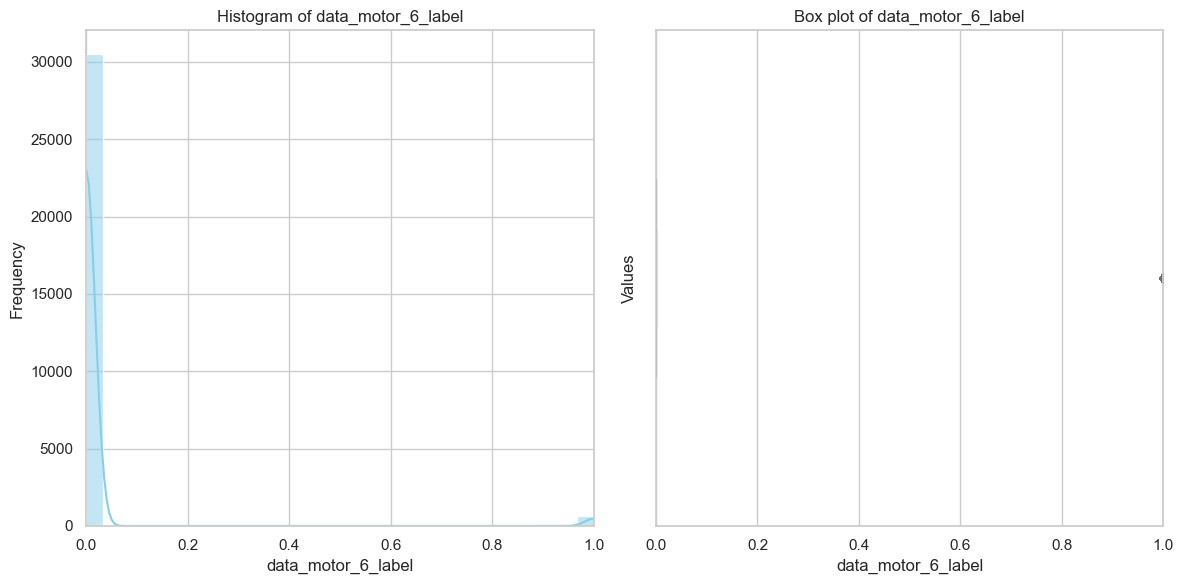

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = df_smooth.columns[1:-1]

sns.set(style="whitegrid")

for column in columns_to_plot:
    min_val = df_smooth[column].min()
    max_val = df_smooth[column].max()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram
    sns.histplot(df_smooth, x=column, ax=axes[0], kde=True, color='skyblue', bins=30) 
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)  
    axes[0].set_ylabel('Frequency')  
    axes[0].set_xlim(min_val, max_val)  
    
    # Plot box plot
    sns.boxplot(x=df_smooth[column], ax=axes[1], color='salmon', width=0.4) 
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)  
    axes[1].set_ylabel('Values') 
    axes[1].set_xlim(min_val, max_val) 

    plt.tight_layout()
    plt.show()


# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

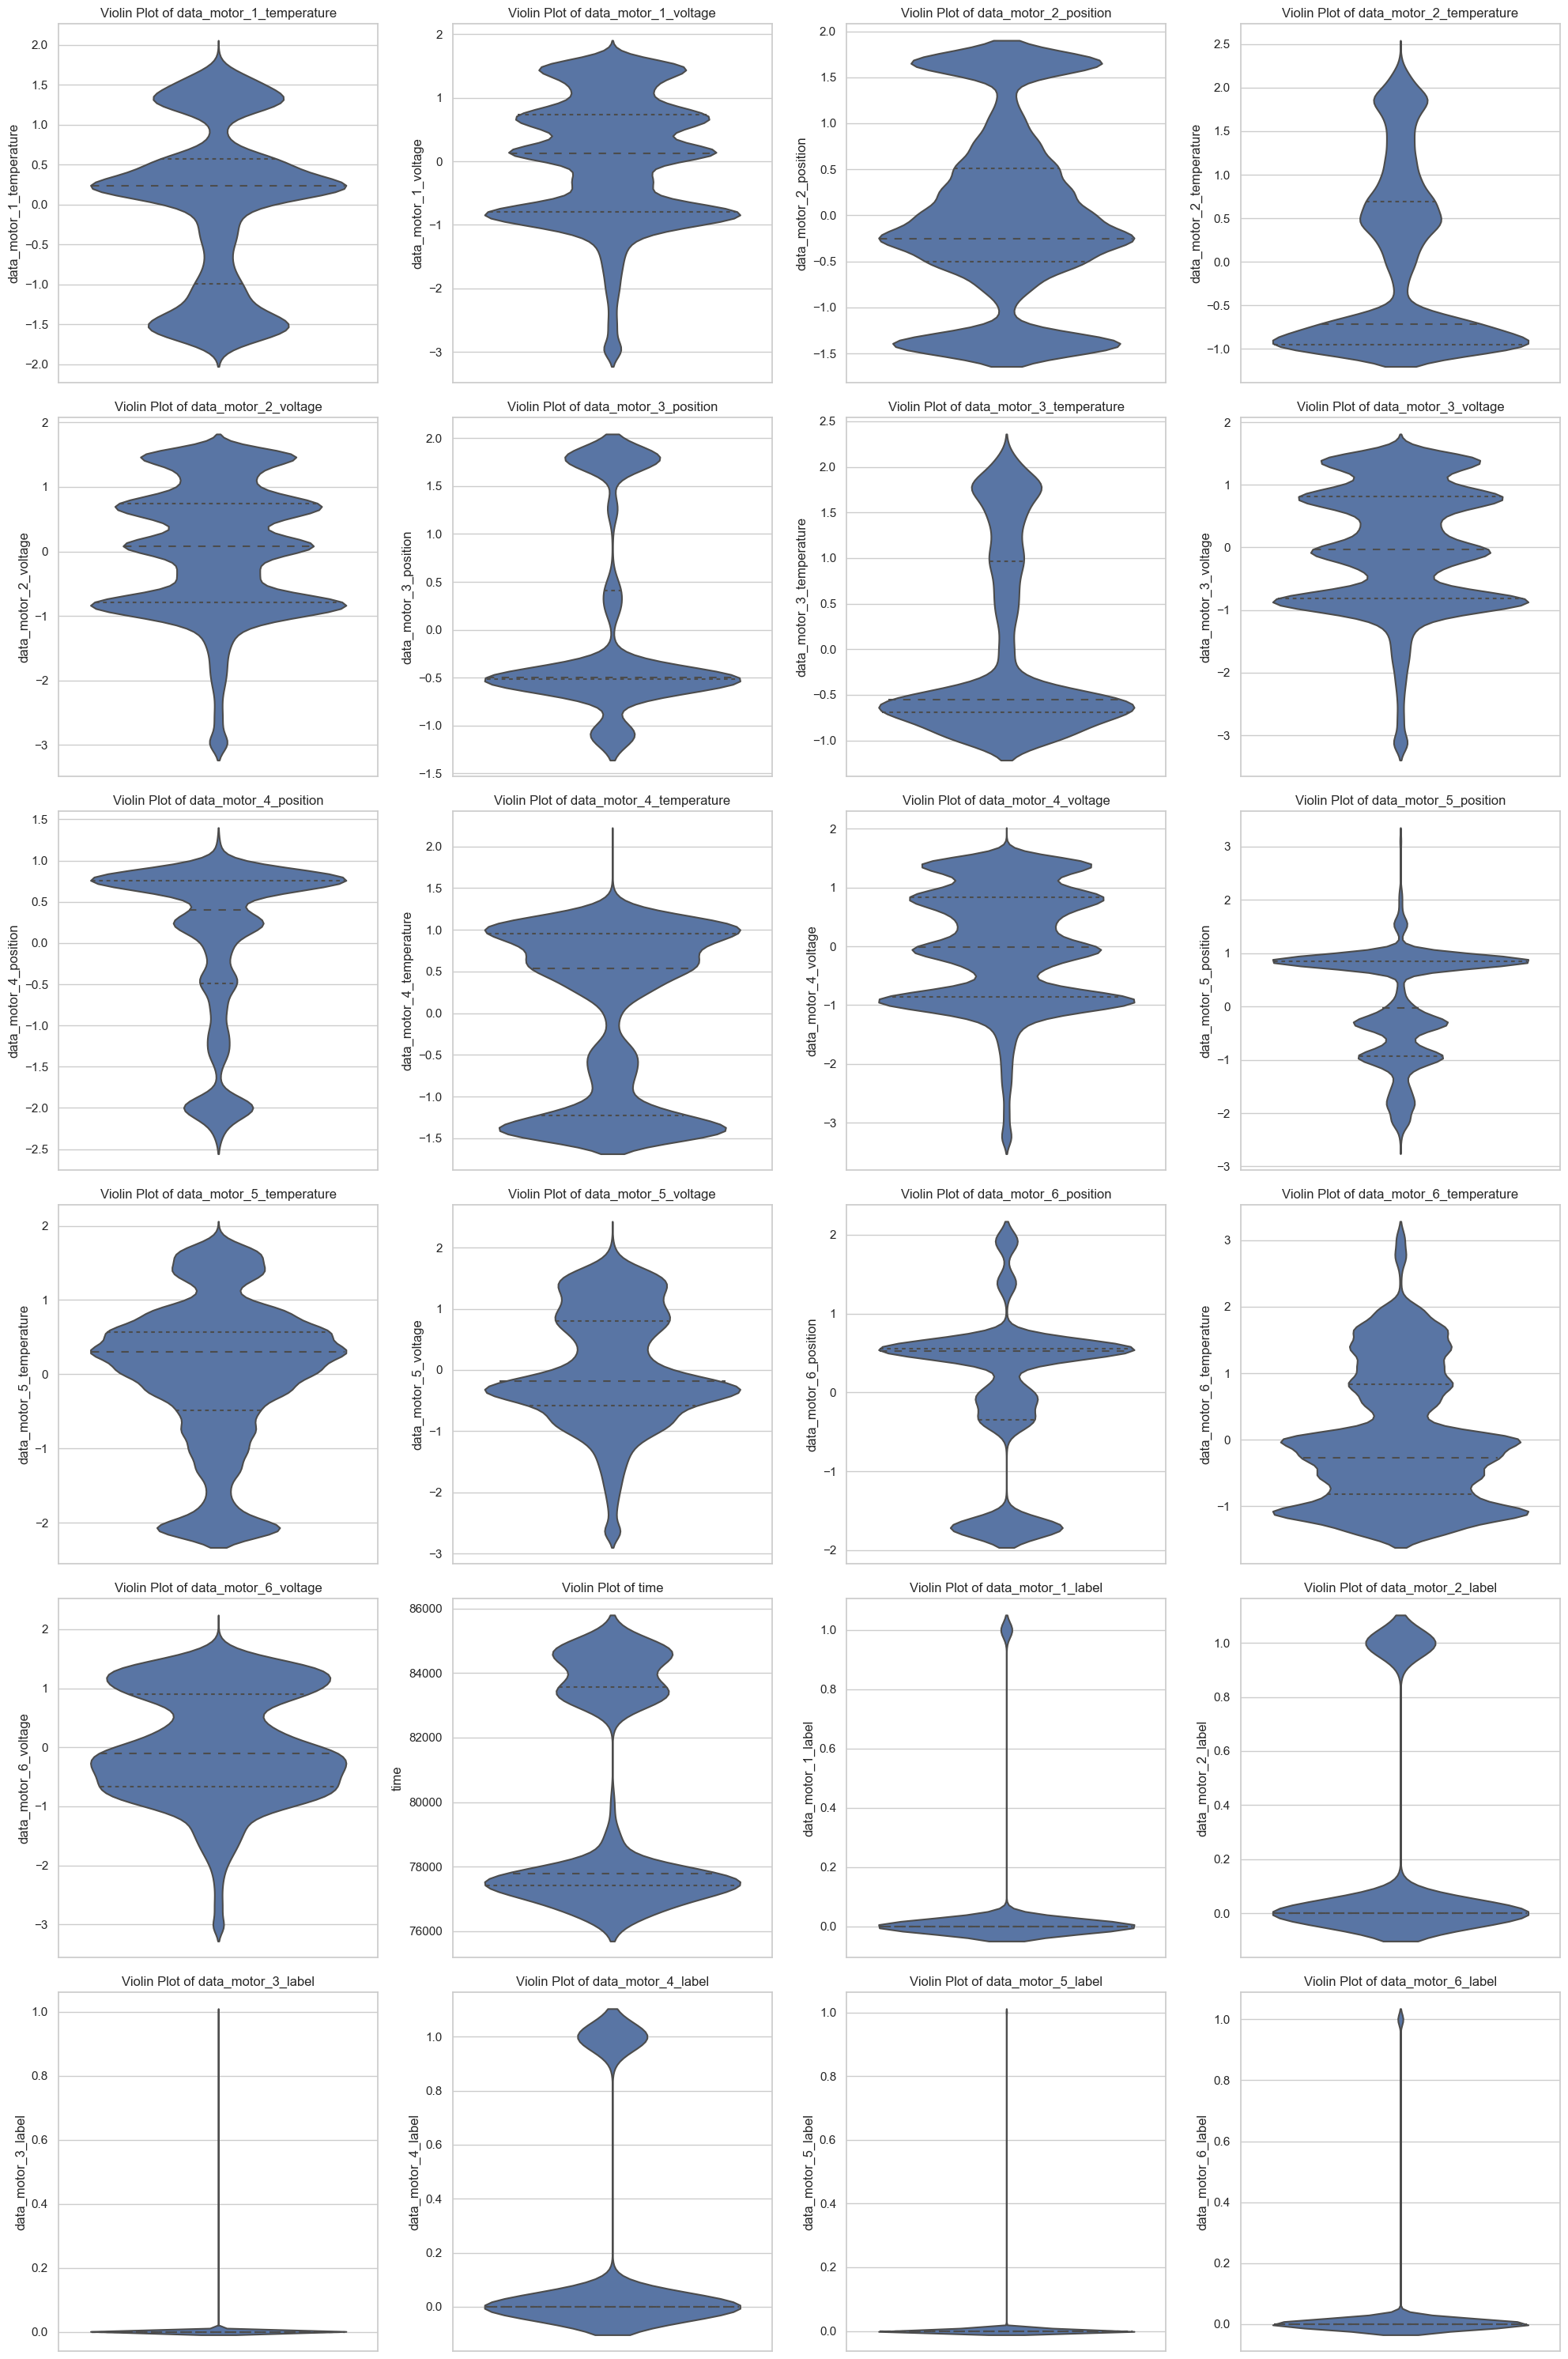

In [159]:
feature_columns = df_smooth.columns[1:-1]

sns.set(style="whitegrid")

num_rows = (len(feature_columns) + 3) // 4

plt.figure(figsize=(20, num_rows * 5))  
for i, feature in enumerate(feature_columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.violinplot(y=feature, data=df_smooth, inner='quartile')
    plt.title('Violin Plot of {}'.format(feature))
    plt.ylabel('{}'.format(feature))
plt.tight_layout()
plt.show()

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

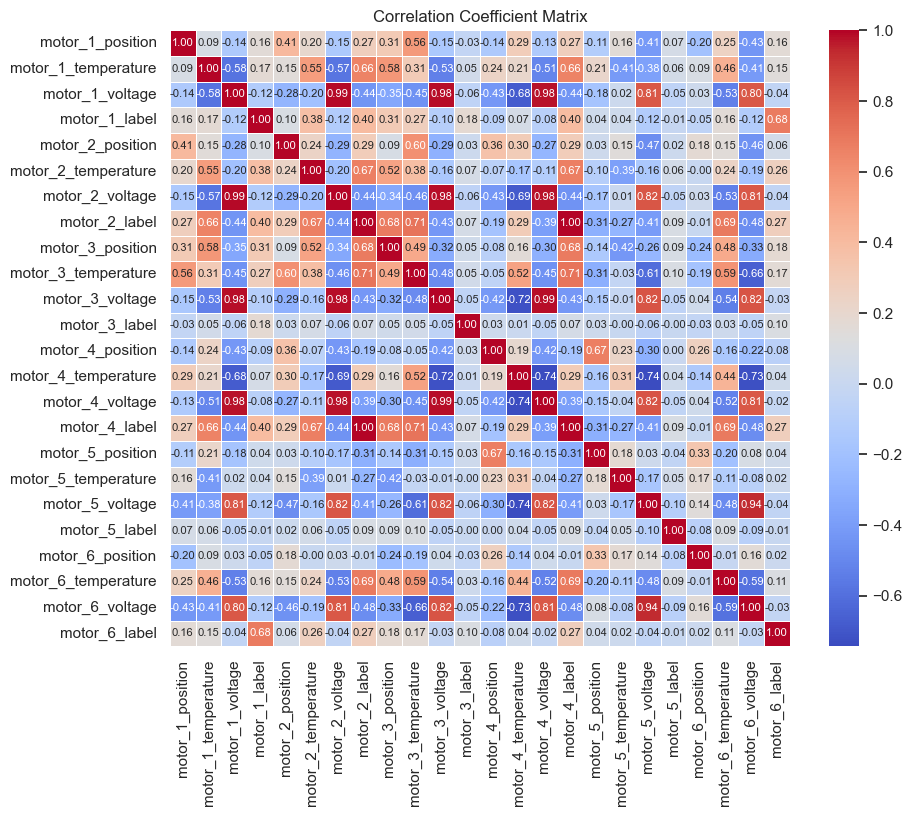

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the first and last columns from the dataframe
col_to_plot = [col for col in df.columns if ('time' not in col and 'test' not in col)]

df_matrix = df_smooth.loc[:, col_to_plot]

correlation_matrix = df_matrix.corr()

# Remove the first and last columns from column names
correlation_matrix.columns = [col[5:] for col in correlation_matrix.columns]
correlation_matrix.index = [index[5:] for index in correlation_matrix.index]

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

plt.title('Correlation Coefficient Matrix')
plt.show()


## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?




After all the data preprocessing, we notice that some features are redundants, because they are highly correlated to other features. As a matter of fact, we can delete the motor 2/3/4 voltage because they have a correlation of nearly one with motor 1 voltage. 

On the other hand, features like motor 5 temperature are not correlated with any other features, except labels which means this is one of the most relevant feature. 

However, we have to be careful and keep lots of features because for example motor 5 label is nearly not correlated to every features so it will be difficult to predict. Thus, we have to keep a lot of (relevant) features to increase the accuracy.


